# 1. 데이터 불러오기

In [280]:
import pandas as pd
import os

pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_columns', None)

PATH = './data/'

file_list= os.listdir(PATH)
csv_list = list()

for file in file_list:
    if file.split(".")[-1] == 'csv':
        csv_list.append(file)
data = ['living_popul', 'resident_popul', 'area', 'store', 'working_popul', 'facilitie', 'estimated_sales']

for name, file in zip(data, csv_list):
    globals()[name] = pd.read_csv(PATH + file, encoding = "ansi")

store = store.drop("Unnamed: 0", axis = 1)
estimated_sales = estimated_sales.drop("Unnamed: 0", axis = 1)

# 2. 데이터 전처리

## 2-0. 시점 통일 & 관광특구 삭제

In [281]:
years = [20223, 20224, 20231, 20232]

living_popul = living_popul[living_popul['기준_년분기_코드'].isin(years)]
resident_popul = resident_popul[resident_popul['기준_년분기_코드'].isin(years)]
store = store[store['기준_년분기_코드'].isin(years)]
working_popul = working_popul[working_popul['기준_년분기_코드'].isin(years)]
facilitie = facilitie[facilitie['기준_년분기_코드'].isin(years)]
estimated_sales = estimated_sales[estimated_sales['기준_년분기_코드'].isin(years)]

In [282]:
living_popul = living_popul[living_popul['상권_구분_코드_명']!='관광특구']
resident_popul = resident_popul[resident_popul['상권_구분_코드_명']!='관광특구']
store = store[store['상권_구분_코드_명']!='관광특구']
working_popul = working_popul[working_popul['상권_구분_코드_명']!='관광특구']
facilitie = facilitie[facilitie['상권_구분_코드_명']!='관광특구']
estimated_sales = estimated_sales[estimated_sales['상권_구분_코드_명']!='관광특구']

## 2-1. 길단위인구 전처리

### 2-1-1 변수 처리

In [283]:
# 파생변수 생성
living_popul['시간대_21_06_유동인구_수'] = living_popul['시간대_00_06_유동인구_수'] + living_popul['시간대_21_24_유동인구_수']
living_popul['주중_유동인구_수'] = living_popul['월요일_유동인구_수'] + living_popul['화요일_유동인구_수'] + living_popul['수요일_유동인구_수'] + living_popul['목요일_유동인구_수'] + living_popul['금요일_유동인구_수']
living_popul['주말_유동인구_수'] = living_popul['토요일_유동인구_수'] + living_popul['일요일_유동인구_수']
living_popul['연령대_30_40_유동인구_수'] = living_popul['연령대_30_유동인구_수'] + living_popul['연령대_40_유동인구_수']
living_popul['연령대_50_60_유동인구_수'] = living_popul['연령대_50_유동인구_수'] + living_popul['연령대_60_이상_유동인구_수']

# 불필요한 변수 제거
living_popul = living_popul.drop(['월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수', 
                                  '시간대_00_06_유동인구_수', '시간대_21_24_유동인구_수',
                                  '연령대_30_유동인구_수','연령대_40_유동인구_수','연령대_50_유동인구_수','연령대_60_이상_유동인구_수'], axis = 1)

### 2-1-2. 결측치/이상치/중복

In [284]:
# 결측값 확인
living_popul.isnull().sum()

기준_년분기_코드           0
상권_구분_코드_명          0
상권_코드_명             0
총_유동인구_수            0
남성_유동인구_수           0
여성_유동인구_수           0
연령대_10_유동인구_수       0
연령대_20_유동인구_수       0
시간대_06_11_유동인구_수    0
시간대_11_14_유동인구_수    0
시간대_14_17_유동인구_수    0
시간대_17_21_유동인구_수    0
시간대_21_06_유동인구_수    0
주중_유동인구_수           0
주말_유동인구_수           0
연령대_30_40_유동인구_수    0
연령대_50_60_유동인구_수    0
dtype: int64

In [285]:
# 통계량 확인
living_popul.describe()

,기준_년분기_코드,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_06_유동인구_수,주중_유동인구_수,주말_유동인구_수,연령대_30_40_유동인구_수,연령대_50_60_유동인구_수
count,6573.000,6573.000,6573.000,6573.000,6573.000,6573.000,6573.000,6573.000,6573.000,6573.000,6573.000,6573.000,6573.000,6573.000,6573.000
mean,20227.499,819172.761,390059.275,429113.498,105750.179,146463.772,166764.988,104697.384,105734.445,141765.368,300210.649,590223.923,228948.919,276078.394,290880.488
std,4.032,860738.310,415405.204,448793.459,112986.973,211285.817,172023.931,119372.114,122503.528,158734.038,318552.356,625430.046,240185.552,311897.390,293363.299
min,20223.000,12.000,12.000,0.000,0.000,0.000,4.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,20223.000,221071.000,106737.000,113709.000,25585.000,32148.000,45786.000,28449.000,28568.000,38153.000,75518.000,158928.000,60054.000,74201.000,79250.000
50%,20224.000,566885.000,269133.000,296501.000,71313.000,82738.000,116615.000,71878.000,71921.000,95899.000,205337.000,405241.000,158567.000,184591.000,205254.000
75%,20231.000,1130788.000,534060.000,588669.000,146355.000,182991.000,233054.000,139191.000,139491.000,193507.000,414441.000,822348.000,311102.000,369148.000,409490.000
max,20232.000,7942915.000,4000287.000,4032096.000,829062.000,3487417.000,1529921.000,1429461.000,1491003.000,1793125.000,2942275.000,6236830.000,2124591.000,3433420.000,2463853.000


In [286]:
# 중복 확인
living_popul[living_popul.duplicated()]

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_06_유동인구_수,주중_유동인구_수,주말_유동인구_수,연령대_30_40_유동인구_수,연령대_50_60_유동인구_수


In [287]:
# 하위 5% 삭제
living_popul = living_popul[living_popul['총_유동인구_수']>living_popul['총_유동인구_수'].quantile(0.05)]

### 2-1-3. 분기별 데이터 연도 기준 변환

In [288]:
living_popul_year = living_popul.groupby(['상권_구분_코드_명','상권_코드_명'],as_index = False)\
                                .mean()\
                                .drop('기준_년분기_코드', axis = 1)

In [289]:
living_popul_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   상권_구분_코드_명        1569 non-null   object 
 1   상권_코드_명           1569 non-null   object 
 2   총_유동인구_수          1569 non-null   float64
 3   남성_유동인구_수         1569 non-null   float64
 4   여성_유동인구_수         1569 non-null   float64
 5   연령대_10_유동인구_수     1569 non-null   float64
 6   연령대_20_유동인구_수     1569 non-null   float64
 7   시간대_06_11_유동인구_수  1569 non-null   float64
 8   시간대_11_14_유동인구_수  1569 non-null   float64
 9   시간대_14_17_유동인구_수  1569 non-null   float64
 10  시간대_17_21_유동인구_수  1569 non-null   float64
 11  시간대_21_06_유동인구_수  1569 non-null   float64
 12  주중_유동인구_수         1569 non-null   float64
 13  주말_유동인구_수         1569 non-null   float64
 14  연령대_30_40_유동인구_수  1569 non-null   float64
 15  연령대_50_60_유동인구_수  1569 non-null   float64
dtypes: float64(14), object(2)
memory usage: 19

## 2-2. 상주인구 전처리

### 2-2-1. 변수 처리

In [290]:
# 파생변수 생성
resident_popul['연령대_30_40_상주인구_수'] = resident_popul['연령대_30_상주인구_수']+resident_popul['연령대_40_상주인구_수']
resident_popul['연령대_50_60_상주인구_수'] = resident_popul['연령대_50_상주인구_수']+resident_popul['연령대_60_이상_상주인구_수']

# 불필요한 변수 제거
resident_popul = resident_popul[['기준_년분기_코드', '상권_구분_코드_명', '상권_코드_명',
                                 '총_상주인구_수', '남성_상주인구_수','여성_상주인구_수', 
                                 '연령대_10_상주인구_수', '연령대_20_상주인구_수', '연령대_30_40_상주인구_수', '연령대_50_60_상주인구_수']]

### 2-2-2. 결측치/이상치/중복

In [291]:
# 결측값 확인
resident_popul.isnull().sum()

기준_년분기_코드           0
상권_구분_코드_명          0
상권_코드_명             0
총_상주인구_수            0
남성_상주인구_수           0
여성_상주인구_수           0
연령대_10_상주인구_수       0
연령대_20_상주인구_수       0
연령대_30_40_상주인구_수    0
연령대_50_60_상주인구_수    0
dtype: int64

In [292]:
# 통계량 확인
resident_popul.describe()

,기준_년분기_코드,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_40_상주인구_수,연령대_50_60_상주인구_수
count,6488.000,6488.000,6488.000,6488.000,6488.000,6488.000,6488.000,6488.000
mean,20227.495,2359.471,1165.882,1193.589,230.282,300.194,789.012,1039.983
std,4.032,2348.110,1159.129,1194.338,262.202,339.598,833.507,1031.546
min,20223.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,20223.000,657.000,326.750,330.750,53.000,70.000,207.000,280.000
50%,20224.000,1614.000,809.000,817.000,147.000,195.000,528.000,720.000
75%,20231.000,3305.000,1639.000,1677.000,318.000,413.250,1083.000,1464.250
max,20232.000,21341.000,10459.000,10882.000,3078.000,4457.000,7626.000,8342.000


In [293]:
# 중복 확인
resident_popul[resident_popul.duplicated()]

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_40_상주인구_수,연령대_50_60_상주인구_수


### 2-2-3. 분기별 데이터 연도 기준 변환

In [294]:
resident_popul_year = resident_popul[resident_popul['기준_년분기_코드'] == 20232].drop(['기준_년분기_코드'],axis=1)

In [295]:
resident_popul_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1619 entries, 19887 to 24481
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   상권_구분_코드_명        1619 non-null   object
 1   상권_코드_명           1619 non-null   object
 2   총_상주인구_수          1619 non-null   int64 
 3   남성_상주인구_수         1619 non-null   int64 
 4   여성_상주인구_수         1619 non-null   int64 
 5   연령대_10_상주인구_수     1619 non-null   int64 
 6   연령대_20_상주인구_수     1619 non-null   int64 
 7   연령대_30_40_상주인구_수  1619 non-null   int64 
 8   연령대_50_60_상주인구_수  1619 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 126.5+ KB


## 2-3. 점포 전처리

### 2-3-1. 변수 처리

In [296]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302726 entries, 1055496 to 1360269
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   기준_년분기_코드    302726 non-null  int64 
 1   상권_구분_코드     302726 non-null  object
 2   상권_구분_코드_명   302726 non-null  object
 3   상권_코드        302726 non-null  int64 
 4   상권_코드_명      302726 non-null  object
 5   서비스_업종_코드    302726 non-null  object
 6   서비스_업종_코드_명  302726 non-null  object
 7   점포_수         302726 non-null  int64 
 8   유사_업종_점포_수   302726 non-null  int64 
 9   개업_율         302726 non-null  int64 
 10  개업_점포_수      302726 non-null  int64 
 11  폐업_률         302726 non-null  int64 
 12  폐업_점포_수      302726 non-null  int64 
 13  프랜차이즈_점포_수   302726 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 34.6+ MB


In [297]:
store['서비스_업종_대분류'] = store['서비스_업종_코드'].str[:3]

In [298]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302726 entries, 1055496 to 1360269
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   기준_년분기_코드    302726 non-null  int64 
 1   상권_구분_코드     302726 non-null  object
 2   상권_구분_코드_명   302726 non-null  object
 3   상권_코드        302726 non-null  int64 
 4   상권_코드_명      302726 non-null  object
 5   서비스_업종_코드    302726 non-null  object
 6   서비스_업종_코드_명  302726 non-null  object
 7   점포_수         302726 non-null  int64 
 8   유사_업종_점포_수   302726 non-null  int64 
 9   개업_율         302726 non-null  int64 
 10  개업_점포_수      302726 non-null  int64 
 11  폐업_률         302726 non-null  int64 
 12  폐업_점포_수      302726 non-null  int64 
 13  프랜차이즈_점포_수   302726 non-null  int64 
 14  서비스_업종_대분류   302726 non-null  object
dtypes: int64(9), object(6)
memory usage: 37.0+ MB


### 2-3-1. 결측치/이상치/중복

In [299]:
# 결측값 확인
store.isnull().sum()

기준_년분기_코드      0
상권_구분_코드       0
상권_구분_코드_명     0
상권_코드          0
상권_코드_명        0
서비스_업종_코드      0
서비스_업종_코드_명    0
점포_수           0
유사_업종_점포_수     0
개업_율           0
개업_점포_수        0
폐업_률           0
폐업_점포_수        0
프랜차이즈_점포_수     0
서비스_업종_대분류     0
dtype: int64

In [300]:
# 통계량 확인
store.describe()

,기준_년분기_코드,상권_코드,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
count,302726.000,302726.000,302726.000,302726.000,302726.000,302726.000,302726.000,302726.000,302726.000
mean,20227.497,3115641.639,5.692,6.126,2.296,0.134,2.482,0.171,0.434
std,4.031,7159.047,25.823,26.281,10.924,0.584,11.827,0.784,2.047
min,20223.000,3110001.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,20223.000,3110447.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000
50%,20224.000,3110877.000,2.000,2.000,0.000,0.000,0.000,0.000,0.000
75%,20231.000,3120143.000,4.000,5.000,0.000,0.000,0.000,0.000,0.000
max,20232.000,3130327.000,2190.000,2191.000,200.000,28.000,400.000,71.000,123.000


In [301]:
# 중복 확인
store[store.duplicated()]

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,서비스_업종_대분류


### 2-3-2. 분기별 데이터 연도 기준 변환

In [302]:
store_year = store[store['기준_년분기_코드'] == 20232].drop(['기준_년분기_코드', '상권_코드', '상권_구분_코드', '서비스_업종_코드', '서비스_업종_대분류'], axis = 1)\
                                                    .groupby(['상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명'], as_index = False)\
                                                    .sum()

In [303]:
store_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75589 entries, 0 to 75588
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   상권_구분_코드_명   75589 non-null  object
 1   상권_코드_명      75589 non-null  object
 2   서비스_업종_코드_명  75589 non-null  object
 3   점포_수         75589 non-null  int64 
 4   유사_업종_점포_수   75589 non-null  int64 
 5   개업_율         75589 non-null  int64 
 6   개업_점포_수      75589 non-null  int64 
 7   폐업_률         75589 non-null  int64 
 8   폐업_점포_수      75589 non-null  int64 
 9   프랜차이즈_점포_수   75589 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 5.8+ MB


## 2-4. 직장인구 전처리

### 2-4-1. 변수 처리

In [304]:
working_popul = working_popul[['기준_년분기_코드', '상권_구분_코드_명', '상권_코드_명', '총_직장_인구_수']]

### 2-4-2. 결측치/이상치/중복

In [305]:
# 결측값 확인
working_popul.isnull().sum()

기준_년분기_코드     0
상권_구분_코드_명    0
상권_코드_명       0
총_직장_인구_수     0
dtype: int64

In [306]:
# 통계량 확인
working_popul.describe()

,기준_년분기_코드,총_직장_인구_수
count,6468.000,6468.000
mean,20227.500,1660.112
std,4.031,5611.955
min,20223.000,1.000
25%,20223.750,105.000
50%,20227.500,315.000
75%,20231.250,876.000
max,20232.000,81127.000


In [307]:
# 중복 확인
working_popul[working_popul.duplicated()]

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,총_직장_인구_수


### 2-4-3. 분기별 데이터 연도 기준 변환

In [308]:
working_popul_year = working_popul[working_popul['기준_년분기_코드'] == 20232].drop(['기준_년분기_코드'],axis=1)

In [309]:
working_popul_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1617 entries, 11546 to 25988
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   상권_구분_코드_명  1617 non-null   object
 1   상권_코드_명     1617 non-null   object
 2   총_직장_인구_수   1617 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 50.5+ KB


## 2-5. 집객시설 전처리

### 2-5-1. 변수 처리

In [310]:
# 파생변수 생성
facilitie['초중고_수'] = facilitie['초등학교_수']+facilitie['중학교_수']+facilitie['고등학교_수']

# 불필요한 변수 제거
facilitie = facilitie.drop(['집객시설_수','철도_역_수', '초등학교_수', '중학교_수', '고등학교_수'], axis=1)

### 2-5-2. 결측치/이상치/중복

In [311]:
# 결측값 확인
facilitie.isnull().sum()

기준_년분기_코드        0
상권_구분_코드_명       0
상권_코드_명          0
관공서_수         3792
은행_수          4364
종합병원_수        6200
일반_병원_수       5764
약국_수          2276
유치원_수         5684
대학교_수         5956
백화점_수         6252
슈퍼마켓_수        5884
극장_수          5972
숙박_시설_수       5720
공항_수          6284
버스_터미널_수      6280
지하철_역_수       5528
버스_정거장_수      1232
초중고_수         6288
dtype: int64

In [312]:
facilitie = facilitie.fillna(0)

In [313]:
# 통계량 확인
facilitie.describe()

,기준_년분기_코드,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수,초중고_수
count,6288.000,6288.000,6288.000,6288.000,6288.000,6288.000,6288.000,6288.000,6288.000,6288.000,6288.000,6288.000,6288.000,6288.000,6288.000,6288.000,6288.000
mean,20227.500,0.678,0.947,0.015,0.107,2.299,0.112,0.087,0.006,0.094,0.066,0.198,0.003,0.001,0.167,3.828,0.000
std,4.031,1.111,2.591,0.125,0.396,3.812,0.386,0.466,0.087,0.467,0.321,0.933,0.101,0.036,0.507,4.789,0.000
min,20223.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,20223.750,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
50%,20227.500,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000
75%,20231.250,1.000,1.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000
max,20232.000,10.000,41.000,2.000,4.000,52.000,6.000,7.000,2.000,8.000,4.000,18.000,4.000,1.000,5.000,85.000,0.000


In [314]:
# 중복 확인
facilitie[facilitie.duplicated()]

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수,초중고_수


### 2-5-3. 분기별 데이터 연도 기준 변환

In [315]:
facilitie_year = facilitie[facilitie['기준_년분기_코드'] == 20232].drop(['기준_년분기_코드'], axis = 1)

In [316]:
facilitie_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1572 entries, 0 to 17269
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   상권_구분_코드_명  1572 non-null   object 
 1   상권_코드_명     1572 non-null   object 
 2   관공서_수       1572 non-null   float64
 3   은행_수        1572 non-null   float64
 4   종합병원_수      1572 non-null   float64
 5   일반_병원_수     1572 non-null   float64
 6   약국_수        1572 non-null   float64
 7   유치원_수       1572 non-null   float64
 8   대학교_수       1572 non-null   float64
 9   백화점_수       1572 non-null   float64
 10  슈퍼마켓_수      1572 non-null   float64
 11  극장_수        1572 non-null   float64
 12  숙박_시설_수     1572 non-null   float64
 13  공항_수        1572 non-null   float64
 14  버스_터미널_수    1572 non-null   float64
 15  지하철_역_수     1572 non-null   float64
 16  버스_정거장_수    1572 non-null   float64
 17  초중고_수       1572 non-null   float64
dtypes: float64(16), object(2)
memory usage: 233.3+ KB


In [317]:
facilitie_year.describe()

,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수,초중고_수
count,1572.000,1572.000,1572.000,1572.000,1572.000,1572.000,1572.000,1572.000,1572.000,1572.000,1572.000,1572.000,1572.000,1572.000,1572.000,1572.000
mean,0.678,0.947,0.015,0.107,2.299,0.112,0.087,0.006,0.094,0.066,0.198,0.003,0.001,0.167,3.828,0.000
std,1.112,2.592,0.125,0.396,3.813,0.386,0.466,0.087,0.467,0.321,0.933,0.101,0.036,0.507,4.791,0.000
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
50%,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000
75%,1.000,1.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000
max,10.000,41.000,2.000,4.000,52.000,6.000,7.000,2.000,8.000,4.000,18.000,4.000,1.000,5.000,85.000,0.000


## 2-6. 추정매출 전처리

### 2-6-1. 변수 처리

In [318]:
# 파생변수 생성
estimated_sales['시간대_21~06_매출_금액'] = estimated_sales['시간대_00~06_매출_금액'] + estimated_sales['시간대_21~24_매출_금액']
estimated_sales['시간대_21~06_매출_건수'] = estimated_sales['시간대_건수~06_매출_건수'] + estimated_sales['시간대_건수~24_매출_건수']
estimated_sales['연령대_30_40_매출_금액'] = estimated_sales['연령대_30_매출_금액'] + estimated_sales['연령대_40_매출_금액']
estimated_sales['연령대_50_60_매출_금액'] = estimated_sales['연령대_50_매출_금액'] + estimated_sales['연령대_60_이상_매출_금액']
estimated_sales['연령대_30_40_매출_건수'] = estimated_sales['연령대_30_매출_건수'] + estimated_sales['연령대_40_매출_건수']
estimated_sales['연령대_50_60_매출_건수'] = estimated_sales['연령대_50_매출_건수'] + estimated_sales['연령대_60_이상_매출_건수']

estimated_sales['서비스_업종_대분류'] = estimated_sales['서비스_업종_코드'].str[:3]

# 불필요한 변수 제거
estimated_sales = estimated_sales.drop(columns = ['서비스_업종_코드'],
                                       axis = 1)

estimated_sales = estimated_sales.drop(columns = ['월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액',
                                                  '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수'],
                                       axis = 1)
estimated_sales = estimated_sales.drop(columns = ['시간대_00~06_매출_금액', '시간대_21~24_매출_금액', '시간대_건수~06_매출_건수', '시간대_건수~24_매출_건수',
                                                 '연령대_30_매출_금액','연령대_40_매출_금액','연령대_50_매출_금액','연령대_60_이상_매출_금액',
                                                 '연령대_30_매출_건수','연령대_40_매출_건수','연령대_50_매출_건수','연령대_60_이상_매출_건수'],
                                       axis = 1)

# 변수 이름 변경
estimated_sales = estimated_sales.rename(columns = {'시간대_건수~11_매출_건수' : '시간대_06~11_매출_건수',
                                                         '시간대_건수~14_매출_건수' : '시간대_11~14_매출_건수',
                                                         '시간대_건수~17_매출_건수' : '시간대_14~17_매출_건수',
                                                         '시간대_건수~21_매출_건수' : '시간대_17~21_매출_건수'})



### 2-6-2. 결측치/이상치/중복

In [319]:
# 결측값 확인
estimated_sales.isnull().sum()

기준_년분기_코드          0
상권_구분_코드           0
상권_구분_코드_명         0
상권_코드              0
상권_코드_명            0
서비스_업종_코드_명        0
당월_매출_금액           0
당월_매출_건수           0
주중_매출_금액           0
주말_매출_금액           0
시간대_06~11_매출_금액    0
시간대_11~14_매출_금액    0
시간대_14~17_매출_금액    0
시간대_17~21_매출_금액    0
남성_매출_금액           0
여성_매출_금액           0
연령대_10_매출_금액       0
연령대_20_매출_금액       0
주중_매출_건수           0
주말_매출_건수           0
시간대_06~11_매출_건수    0
시간대_11~14_매출_건수    0
시간대_14~17_매출_건수    0
시간대_17~21_매출_건수    0
남성_매출_건수           0
여성_매출_건수           0
연령대_10_매출_건수       0
연령대_20_매출_건수       0
시간대_21~06_매출_금액    0
시간대_21~06_매출_건수    0
연령대_30_40_매출_금액    0
연령대_50_60_매출_금액    0
연령대_30_40_매출_건수    0
연령대_50_60_매출_건수    0
서비스_업종_대분류         0
dtype: int64

In [320]:
# 통계량 확인
estimated_sales.describe()

,기준_년분기_코드,상권_코드,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,주중_매출_건수,주말_매출_건수,시간대_06~11_매출_건수,시간대_11~14_매출_건수,시간대_14~17_매출_건수,시간대_17~21_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,시간대_21~06_매출_금액,시간대_21~06_매출_건수,연령대_30_40_매출_금액,연령대_50_60_매출_금액,연령대_30_40_매출_건수,연령대_50_60_매출_건수
count,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000,83142.000
mean,20227.506,3116851.531,1057530630.270,37378.921,800998140.292,256532440.674,112812620.583,270639855.442,263642589.533,289522260.989,482553877.888,454435667.863,5388979.464,125426918.046,28218.137,9160.785,5231.569,9703.087,7869.907,9959.027,18572.037,17223.529,559.116,7452.457,120913224.832,4615.330,406737845.752,399433563.022,15695.358,12088.637
std,4.031,7072.715,9247199458.539,158825.344,6375468667.307,3472245561.224,1170991051.609,2448384035.026,3090139741.176,2707954382.716,4423202984.139,3474196467.177,29279037.589,839832564.084,111071.872,54745.766,27854.478,43249.044,41592.007,44177.137,80157.083,76442.682,3521.526,39113.158,983837619.257,22925.971,3379770530.233,3754679997.219,67955.953,60479.077
min,20223.000,3110001.000,12.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,20224.000,3110566.000,48000000.000,859.000,35761235.750,7349956.500,135702.250,5399863.500,7746083.500,11697304.250,19337881.500,17810972.500,0.000,1333739.750,646.000,152.000,6.000,107.000,171.000,224.000,386.000,337.000,0.000,42.000,0.000,0.000,15640213.000,15286881.750,321.000,294.000
50%,20231.000,3120001.000,184854645.500,4585.000,138333420.000,37661145.000,6136944.500,34222861.000,35608985.500,49693963.000,82942230.000,74623180.000,160833.000,12158489.500,3400.000,1018.000,165.000,967.000,966.000,1287.000,2253.000,1937.500,12.000,438.000,3981946.500,76.000,68591283.500,62915461.000,1756.000,1620.000
75%,20232.000,3120186.000,670335090.750,24990.750,508560976.750,146729693.250,47316932.250,149821606.500,139409257.750,182213664.750,307190696.500,282747046.500,2212020.500,62126169.750,18704.250,5709.750,1965.000,6277.000,5095.000,6880.000,11848.000,11338.000,170.000,3233.750,50244980.000,1468.000,254483601.000,235029535.000,9660.000,8417.250
max,20232.000,3130327.000,995677000000.000,12090273.000,669799000000.000,485357000000.000,107916000000.000,242249000000.000,326543000000.000,386343000000.000,537243000000.000,304162000000.000,1549259735.000,90669553834.000,5827863.000,6262410.000,1474148.000,2611826.000,3245770.000,4287338.000,6708993.000,4615812.000,329040.000,3087414.000,126314287024.000,1514884.000,354347000000.000,411544000000.000,4519958.000,5329793.000


In [321]:
# 중복 확인
estimated_sales[estimated_sales.duplicated()]

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,주중_매출_건수,주말_매출_건수,시간대_06~11_매출_건수,시간대_11~14_매출_건수,시간대_14~17_매출_건수,시간대_17~21_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,시간대_21~06_매출_금액,시간대_21~06_매출_건수,연령대_30_40_매출_금액,연령대_50_60_매출_금액,연령대_30_40_매출_건수,연령대_50_60_매출_건수,서비스_업종_대분류


In [322]:
def sales_tran(df):
    if df['당월_법인_매출_금액'] < 0:
        return df['당월_매출_금액'] - df['당월_법인_매출_금액']
    else :
        return df['당월_매출_금액']
estimated_sales = estimated_sales[estimated_sales['당월_매출_금액'] > estimated_sales['당월_매출_금액'].quantile(0.05)]
estimated_sales['당월_개인_매출_금액'] = estimated_sales['남성_매출_금액'] + estimated_sales['여성_매출_금액']
estimated_sales['당월_법인_매출_금액'] =  estimated_sales['당월_매출_금액'] - estimated_sales['당월_개인_매출_금액']

estimated_sales['당월_매출_금액'] = estimated_sales.apply(lambda x : sales_tran(x) , axis=1)

estimated_sales.loc[estimated_sales['당월_법인_매출_금액']<0, '당월_법인_매출_금액'] = 0

In [323]:
estimated_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78928 entries, 119954 to 203847
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준_년분기_코드        78928 non-null  int64  
 1   상권_구분_코드         78928 non-null  object 
 2   상권_구분_코드_명       78928 non-null  object 
 3   상권_코드            78928 non-null  int64  
 4   상권_코드_명          78928 non-null  object 
 5   서비스_업종_코드_명      78928 non-null  object 
 6   당월_매출_금액         78928 non-null  float64
 7   당월_매출_건수         78928 non-null  int64  
 8   주중_매출_금액         78928 non-null  float64
 9   주말_매출_금액         78928 non-null  float64
 10  시간대_06~11_매출_금액  78928 non-null  float64
 11  시간대_11~14_매출_금액  78928 non-null  float64
 12  시간대_14~17_매출_금액  78928 non-null  float64
 13  시간대_17~21_매출_금액  78928 non-null  float64
 14  남성_매출_금액         78928 non-null  float64
 15  여성_매출_금액         78928 non-null  float64
 16  연령대_10_매출_금액     78928 non-null  int64  
 17  연령대_20_매출_금

### 2-6-3. 서비스 업종 선택

In [324]:
service_list = ['한식음식점', '미용실', '커피-음료', '편의점',  '일반의류', '분식전문점', '호프-간이주점', '의약품', '일반교습학원', '치킨전문점', '노래방', '일반의원', '중식음식점',  '패스트푸드점', '제과점', '치과의원', '일식음식점','양식음식점']
estimated_sales = estimated_sales[estimated_sales['서비스_업종_코드_명'].isin(service_list)]

In [325]:
estimated_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45267 entries, 119954 to 203846
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준_년분기_코드        45267 non-null  int64  
 1   상권_구분_코드         45267 non-null  object 
 2   상권_구분_코드_명       45267 non-null  object 
 3   상권_코드            45267 non-null  int64  
 4   상권_코드_명          45267 non-null  object 
 5   서비스_업종_코드_명      45267 non-null  object 
 6   당월_매출_금액         45267 non-null  float64
 7   당월_매출_건수         45267 non-null  int64  
 8   주중_매출_금액         45267 non-null  float64
 9   주말_매출_금액         45267 non-null  float64
 10  시간대_06~11_매출_금액  45267 non-null  float64
 11  시간대_11~14_매출_금액  45267 non-null  float64
 12  시간대_14~17_매출_금액  45267 non-null  float64
 13  시간대_17~21_매출_금액  45267 non-null  float64
 14  남성_매출_금액         45267 non-null  float64
 15  여성_매출_금액         45267 non-null  float64
 16  연령대_10_매출_금액     45267 non-null  int64  
 17  연령대_20_매출_금

### 2-6-4. 분기별 데이터 연도 기준 변환

In [326]:
estimated_sales_year = estimated_sales.drop(columns = ['기준_년분기_코드','상권_구분_코드','상권_코드', '서비스_업종_대분류'])\
                                      .groupby(['상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명'], as_index = False)\
                                      .mean()

In [327]:
estimated_sales_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11784 entries, 0 to 11783
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   상권_구분_코드_명       11784 non-null  object 
 1   상권_코드_명          11784 non-null  object 
 2   서비스_업종_코드_명      11784 non-null  object 
 3   당월_매출_금액         11784 non-null  float64
 4   당월_매출_건수         11784 non-null  float64
 5   주중_매출_금액         11784 non-null  float64
 6   주말_매출_금액         11784 non-null  float64
 7   시간대_06~11_매출_금액  11784 non-null  float64
 8   시간대_11~14_매출_금액  11784 non-null  float64
 9   시간대_14~17_매출_금액  11784 non-null  float64
 10  시간대_17~21_매출_금액  11784 non-null  float64
 11  남성_매출_금액         11784 non-null  float64
 12  여성_매출_금액         11784 non-null  float64
 13  연령대_10_매출_금액     11784 non-null  float64
 14  연령대_20_매출_금액     11784 non-null  float64
 15  주중_매출_건수         11784 non-null  float64
 16  주말_매출_건수         11784 non-null  float64
 17  시간대_06~11_매출

## 2-7. 데이터 병합

In [328]:
df = pd.merge(living_popul_year, resident_popul_year)
df = pd.merge(df, store_year)
df = pd.merge(df, working_popul_year)
df = pd.merge(df, facilitie_year)
df = pd.merge(df, estimated_sales_year)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11513 entries, 0 to 11512
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   상권_구분_코드_명        11513 non-null  object 
 1   상권_코드_명           11513 non-null  object 
 2   총_유동인구_수          11513 non-null  float64
 3   남성_유동인구_수         11513 non-null  float64
 4   여성_유동인구_수         11513 non-null  float64
 5   연령대_10_유동인구_수     11513 non-null  float64
 6   연령대_20_유동인구_수     11513 non-null  float64
 7   시간대_06_11_유동인구_수  11513 non-null  float64
 8   시간대_11_14_유동인구_수  11513 non-null  float64
 9   시간대_14_17_유동인구_수  11513 non-null  float64
 10  시간대_17_21_유동인구_수  11513 non-null  float64
 11  시간대_21_06_유동인구_수  11513 non-null  float64
 12  주중_유동인구_수         11513 non-null  float64
 13  주말_유동인구_수         11513 non-null  float64
 14  연령대_30_40_유동인구_수  11513 non-null  float64
 15  연령대_50_60_유동인구_수  11513 non-null  float64
 16  총_상주인구_수          11513 non-null  int64 

In [330]:
df.describe()

,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_06_유동인구_수,주중_유동인구_수,주말_유동인구_수,연령대_30_40_유동인구_수,연령대_50_60_유동인구_수,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_40_상주인구_수,연령대_50_60_상주인구_수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,총_직장_인구_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수,초중고_수,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,주중_매출_건수,주말_매출_건수,시간대_06~11_매출_건수,시간대_11~14_매출_건수,시간대_14~17_매출_건수,시간대_17~21_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,시간대_21~06_매출_금액,시간대_21~06_매출_건수,연령대_30_40_매출_금액,연령대_50_60_매출_금액,연령대_30_40_매출_건수,연령대_50_60_매출_건수,당월_개인_매출_금액,당월_법인_매출_금액
count,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000,11513.000
mean,1211037.144,578196.929,632840.220,152437.166,226974.635,243474.672,160090.779,162936.372,216876.838,427658.578,876104.951,334932.276,415889.034,415736.384,3141.053,1553.810,1587.243,294.053,339.854,1102.698,1404.447,13.551,15.697,3.247,0.518,3.692,0.500,2.145,3082.973,1.022,1.874,0.024,0.191,4.127,0.142,0.110,0.013,0.099,0.123,0.284,0.000,0.003,0.308,5.724,0.000,1127176796.796,48715.655,846425021.248,280751768.989,97207552.932,283526941.096,235850769.239,339136479.451,526780936.813,494085777.877,7213848.829,166139856.549,37342.214,11373.441,7251.003,13027.445,9260.878,12515.546,24955.359,21696.244,757.426,10471.241,171455017.055,6660.782,471838183.581,375674363.590,21627.374,13795.544,1020866714.690,106310082.105
std,1022699.287,498304.175,529932.105,130094.144,280693.862,199986.486,150787.356,156144.012,198937.956,365209.849,747950.585,283084.153,382745.547,331536.613,2673.348,1321.968,1358.338,297.319,303.658,990.299,1191.003,40.924,42.168,7.058,1.274,9.008,1.330,4.649,8313.399,1.353,3.701,0.163,0.533,5.116,0.430,0.506,0.128,0.534,0.450,1.163,0.000,0.052,0.670,6.131,0.000,6057622438.083,154497.353,3661934594.558,2625749947.056,514094509.734,1583843583.111,2177946848.222,2000614526.558,2632625270.657,3345718844.521,32581330.925,884472028.135,114038.868,47653.794,30335.601,42974.786,38508.859,43141.552,78730.902,76210.740,3457.389,40000.058,655109005.373,24671.561,2924045120.969,2277972559.966,74795.822,40404.250,5892152812.892,647999301.706
min,41356.500,18580.500,18881.000,1732.667,2419.500,7537.000,5020.250,4708.500,5842.000,5784.250,29058.000,9312.000,9347.500,11240.750,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6037001.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,845658.500,0.000
25%,511505.250,242767.000,268390.750,59388.000,74162.750,104859.500,68186.000,68569.750,91056.000,163565.750,367181.750,142459.500,166624.750,177423.750,1167.000,579.000,594.000,87.000,110.000,378.000,509.000,3.000,4.000,0.000,0.000,0.000,0.000,0.000,230.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,76958181.250,2180.750,55148332.000,18172417.667,477482.250,

In [331]:
df.head()

,상권_구분_코드_명,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_06_유동인구_수,주중_유동인구_수,주말_유동인구_수,연령대_30_40_유동인구_수,연령대_50_60_유동인구_수,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_40_상주인구_수,연령대_50_60_상주인구_수,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,총_직장_인구_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수,초중고_수,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,주중_매출_건수,주말_매출_건수,시간대_06~11_매출_건수,시간대_11~14_매출_건수,시간대_14~17_매출_건수,시간대_17~21_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,시간대_21~06_매출_금액,시간대_21~06_매출_건수,연령대_30_40_매출_금액,연령대_50_60_매출_금액,연령대_30_40_매출_건수,연령대_50_60_매출_건수,당월_개인_매출_금액,당월_법인_매출_금액
0,골목상권,4.19민주묘지역 2번,868030.000,361490.250,506539.250,128381.000,163223.250,169905.000,105148.000,103902.500,145960.750,343114.000,619012.250,249017.500,221593.250,354833.000,1247,596,651,135,121,324,667,미용실,3,3,0,0,0,0,0,96,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,34384167.000,1306.500,21903351.000,12480816.000,862554.500,9952889.750,10859155.000,12330743.000,20974955.000,13117808.250,136012.500,3947675.500,824.500,482.000,55.000,368.500,438.250,440.250,919.500,384.000,10.500,177.500,378824.750,4.500,20604973.000,9404102.250,788.750,326.500,34092763.250,291403.750
1,골목상권,4.19민주묘지역 2번,868030.000,361490.250,506539.250,128381.000,163223.250,169905.000,105148.000,103902.500,145960.750,343114.000,619012.250,249017.500,221593.250,354833.000,1247,596,651,135,121,324,667,분식전문점,2,3,0,0,0,0,1,96,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,116484380.667,11618.333,73379411.667,43104969.000,2948848.333,24056213.667,28566904.667,46828332.333,48130947.000,67577039.667,2272384.000,24387549.667,7502.333,4116.000,175.333,2425.333,3058.333,4640.333,4431.333,7173.667,309.667,2723.000,14084081.667,1319.000,52310936.000,36737117.000,5420.667,3152.000,115707986.667,776394.000
2,골목상권,4.19민주묘지역 2번,868030.000,361490.250,506539.250,128381.000,163223.250,169905.000,105148.000,103902.500,145960.750,343114.000,619012.250,249017.500,221593.250,354833.000,1247,596,651,135,121,324,667,일식음식점,3,3,0,0,0,0,0,96,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,18435727.000,1519.250,15543098.250,2892628.750,0.000,9658447.500,3074001.750,5623422.500,7005386.750,11430340.250,561557.250,6405609.500,1359.250,160.000,0.000,821.500,247.000,441.750,463.250,1056.000,55.250,601.250,79855.250,9.000,6061697.500,5406862.750,495.250,367.500,18435727.000,0.000
3,골목상권,4.19민주묘지역 2번,868030.000,361490.250,506539.250,128381.000,163223.250,169905.000,105148.000,103902.500,145960.750,343114.000,619012.250,249017.500,221593.250,354833.000,1247,596,651,135,121,324,667,치킨전문점,1,3,0,0,0,0,2,96,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,66483629.000,2189.750,43158115.000,23325514.000,52763.750,1660777.000,5881497.500,31315232.250,40050256.500,22819818.250,208308.750,6765486.000,1372.000,817.750,1.250,81.750,189.250,1130.500,1291.500,851.250,11.500,244.000,27573358.500,787.000,24407459.000,31488820.500,835.500,1050.750,62870074.750,3613554.250
4,골목상권,4.19민주묘지역 2번,868030.000,361490.250,506539.250,128381.000,163223.250,169905.000,105148.000,103902.500,145960.750,343114.000,619012.250,249017.500,221593.250,354833.000,1247,596,651,135,121,324,667,커피-음료,3,4,0,0,0,0,1,96,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,366772357.500,44223.750,229175262.500,137597095.000,51444290.750,68243920.000,75151055.250,91457383.750,170207345.250,193885402.500,6104389.500,90242333.750,29133.750,15090.000,6777.500,8375.250,9374.250,11000.250,19724.750,24327.250,978.000,12572.750,80475707.750,8696.500,

# 3. 데이터 모델링

## 3-0. 분석에 적합한 데이터로 변환

## 3-1. 주성분 분석

### 3-1-0. 한글폰트 설정

In [353]:
import matplotlib as mpl
import matplotlib.pylab as plt

# 한글깨짐 해결
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)

# 마이너스 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

### 3-1-1. 주성분 분석 함수

In [398]:
def pca_function(df,k):
    import numpy as np
    import pandas as pd
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    import matplotlib.pyplot as plt
    
    numeric_columns = df.select_dtypes(include='number')
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_columns)
    
    # PCA 적용
    pca = PCA()
    principal_components = pca.fit_transform(scaled_data)
    
    # 설명된 분산 비율
    explained_variance_ratio = pca.explained_variance_ratio_
    
    # 설명된 분산을 그래프로 표시
    plt.plot(np.cumsum(explained_variance_ratio))
    plt.xlabel('주성분 개수')
    plt.ylabel('누적 설명 분산')
    plt.title('주성분 개수 vs 누적 설명 분산')
    plt.show()
    
    plt.plot(pca.explained_variance_ratio_)
    plt.xlabel('주성분 개수')
    plt.ylabel('분산')
    plt.title('주성분 개수 vs 분산')
    plt.show()
    
    # 원하는 주성분 수 선택 (예: 2)
    num_components = k
    selected_components = principal_components[:, :num_components]
    
    # 주성분을 포함한 새로운 DataFrame 생성
    pc_df = pd.DataFrame(data=selected_components, columns=[f'PC{i+1}' for i in range(num_components)])
    
    # 주성분을 포함한 결과 DataFrame 표시
    # print(pc_df)
    print(np.sum(pca.explained_variance_ratio_[:k+1]))
    return pc_df

## 3-2. 엘보우 기법 함수

In [355]:
def Elbow_function(df):
    from yellowbrick.cluster import KElbowVisualizer
    from sklearn.cluster import KMeans
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(1,10))
    visualizer.fit(df)

## 3-3. K-means 군집분석 함수

In [356]:
def kmeans_modeling_function(df,k):
    from sklearn.cluster import KMeans
    # df_scale = pc_df.copy()
    # k = 4
    
    # 그룹 수, random_state 설정
    model = KMeans(n_clusters = k, random_state = 10)
    
    # 정규화된 데이터에 학습
    model.fit(df)
    
    # 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
    df['cluster'] = model.fit_predict(df)

    print(df['cluster'].value_counts())
    
    return df

## 3-4. 군집 시각화 함수

In [357]:
def Model_performance_evaluation(df,n):
    from sklearn.decomposition import PCA
 
    pca = PCA(n_components = n)
    pca_transformed = pca.fit_transform(df)
    pca_transformed
    
    df['pca_x'] = pca_transformed[:, 0]  #x좌표
    df['pca_y'] = pca_transformed[:, 1]  #y좌표

    import matplotlib.pyplot as plt

    markers = {}  # Create a dictionary to store markers

    for i in range(n):
        markers[f'marker{i}'] = df[df['cluster'] == i].index
        plt.scatter(x=df.loc[markers[f'marker{i}'], 'pca_x'], y=df.loc[markers[f'marker{i}'], 'pca_y'], marker='o')
    
    
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    # plt.title(f'{n} Clusters Visualization by 2 PCA Components')
    plt.legend(['cluster0', 'cluster1', 'cluster2','cluster3'])
    plt.show()

## 3-5. 서비스 업종별 모델링

In [414]:
df['서비스_업종_코드_명'].unique()

array(['미용실', '분식전문점', '일식음식점', '치킨전문점', '커피-음료', '패스트푸드점', '편의점',
       '한식음식점', '일반교습학원', '일반의류', '호프-간이주점', '노래방', '일반의원', '치과의원',
       '중식음식점', '의약품', '양식음식점', '제과점'], dtype=object)

### 3-5-1. 미용실

In [424]:
df_hair_shop = scale_df[scale_df['서비스_업종_코드_명']=='미용실']
df_hair_shop = df_hair_shop.reset_index(drop=True)
df_hair_shop.shape

(1032, 78)

In [425]:
df_hair_shop.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_06_유동인구_수,주중_유동인구_수,주말_유동인구_수,연령대_30_40_유동인구_수,연령대_50_60_유동인구_수,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_40_상주인구_수,연령대_50_60_상주인구_수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,총_직장_인구_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수,초중고_수,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,주중_매출_건수,주말_매출_건수,시간대_06~11_매출_건수,시간대_11~14_매출_건수,시간대_14~17_매출_건수,시간대_17~21_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,시간대_21~06_매출_금액,시간대_21~06_매출_건수,연령대_30_40_매출_금액,연령대_50_60_매출_금액,연령대_30_40_매출_건수,연령대_50_60_매출_건수,당월_개인_매출_금액,당월_법인_매출_금액
0,골목상권,4.19민주묘지역 2번,미용실,-0.335,-0.435,-0.238,-0.185,-0.227,-0.368,-0.364,-0.378,-0.356,-0.232,-0.344,-0.304,-0.508,-0.184,-0.709,-0.725,-0.689,-0.535,-0.721,-0.786,-0.619,-0.258,-0.301,-0.460,-0.406,-0.410,-0.376,-0.461,-0.359,-0.756,-0.506,-0.148,-0.359,-0.611,-0.330,1.757,-0.105,-0.186,-0.274,-0.244,0.000,-0.052,-0.460,-0.281,0.000,-0.180,-0.307,-0.225,-0.102,-0.187,-0.173,-0.103,-0.163,-0.192,-0.144,-0.217,-0.183,-0.320,-0.229,-0.237,-0.295,-0.229,-0.280,-0.305,-0.280,-0.216,-0.257,-0.261,-0.270,-0.154,-0.161,-0.279,-0.333,-0.167,-0.164
1,골목상권,GS강동자이아파트,미용실,-0.363,-0.392,-0.333,0.177,-0.488,-0.369,-0.408,-0.393,-0.357,-0.284,-0.400,-0.254,-0.473,-0.231,0.113,0.130,0.096,0.370,0.241,-0.037,0.131,0.011,-0.017,1.382,1.164,0.367,0.376,-0.246,-0.321,-0.017,-0.506,-0.148,-0.359,-0.807,-0.330,-0.217,-0.105,-0.186,-0.274,-0.244,0.000,-0.052,-0.460,-0.444,0.000,-0.169,-0.290,-0.214,-0.092,-0.183,-0.160,-0.093,-0.152,-0.182,-0.133,-0.189,-0.182,-0.306,-0.205,-0.233,-0.275,-0.207,-0.260,-0.285,-0.267,-0.213,-0.254,-0.261,-0.270,-0.148,-0.142,-0.269,-0.290,-0.157,-0.157
2,골목상권,KB국민은행 망원동지점,미용실,-0.366,-0.427,-0.306,-0.391,-0.345,-0.438,-0.397,-0.359,-0.285,-0.314,-0.385,-0.308,-0.308,-0.329,-0.143,-0.194,-0.093,0.111,-0.125,-0.231,-0.125,0.035,-0.017,-0.460,-0.406,-0.410,-0.376,-0.461,-0.337,-0.017,-0.236,-0.148,-0.359,-0.416,-0.330,-0.217,-0.105,-0.186,-0.274,-0.244,0.000,-0.052,-0.460,-0.444,0.000,-0.182,-0.310,-0.226,-0.104,-0.188,-0.175,-0.105,-0.165,-0.197,-0.143,-0.221,-0.187,-0.322,-0.235,-0.238,-0.298,-0.234,-0.283,-0.313,-0.278,-0.219,-0.261,-0.262,-0.270,-0.159,-0.158,-0.286,-0.327,-0.169,-0.163
3,골목상권,KB국민은행 중화동지점,미용실,-0.647,-0.640,-0.647,-0.665,-0.568,-0.646,-0.687,-0.689,-0.658,-0.521,-0.658,-0.598,-0.661,-0.491,-0.239,-0.222,-0.253,-0.337,-0.223,-0.449,-0.021,-0.233,-0.277,-0.460,-0.406,-0.410,-0.376,-0.461,-0.352,-0.756,-0.236,-0.148,-0.359,-0.807,-0.330,-0.217,-0.105,-0.186,-0.274,-0.244,0.000,-0.052,-0.460,-0.934,0.000,-0.180,-0.309,-0.223,-0.104,-0.184,-0.171,-0.102,-0.164,-0.199,-0.137,-0.221,-0.187,-0.320,-0.235,-0.236,-0.296,-0.232,-0.284,-0.315,-0.274,-0.219,-0.261,-0.262,-0.270,-0.160,-0.151,-0.287,-0.322,-0.167,-0.164
4,골목상권,KT금천빌딩(금천구시설관리공단),미용실,-1.113,-1.086,-1.126,-1.051,-0.783,-1.143,-0.986,-0.965,-1.017,-1.116,-1.100,-1.114,-1.028,-1.170,-1.091,-1.091,-1.085,-0.935,-1.034,-1.057,-1.073,-0.185,-0.206,-0.460,-0.406,-0.410,-0.376,-0.246,-0.320,0.723,-0.506,-0.148,-0.359,-0.611,-0.330,-0.217,-0.105,-0.186,-0.274,-0.244,0.000,-0.052,-0.460,-0.607,0.000,-0.156,-0.278,-0.200,-0.080,-0.180,-0.144,-0.083,-0.135,-0.171,-0.116,-0.125,-0.159,-0.295,-0.195,-0.229,-0.267,-0.197,-0.238,-0.276,-0.251,-0.152,-0.246,-0.261,-0.270,-0.128,-0.141,-0.248,-0.297,-0.143,-0.161


#### 주성분 분석

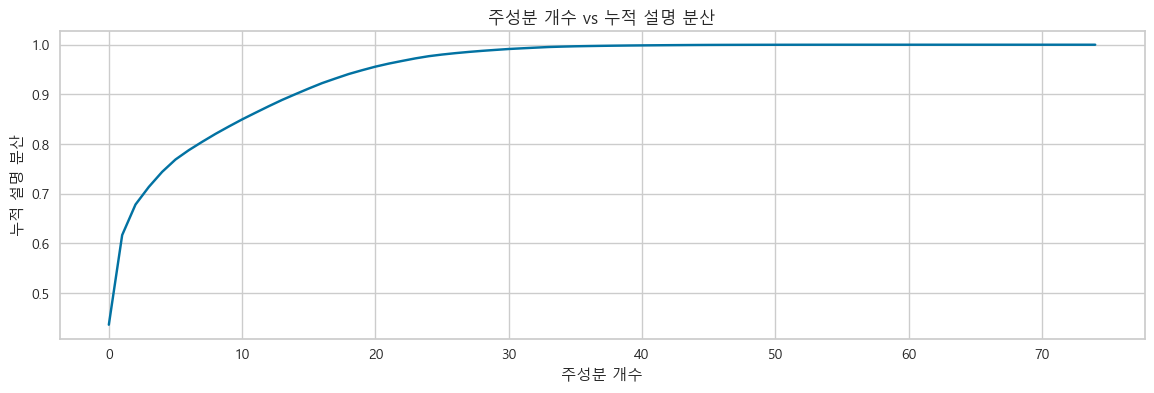

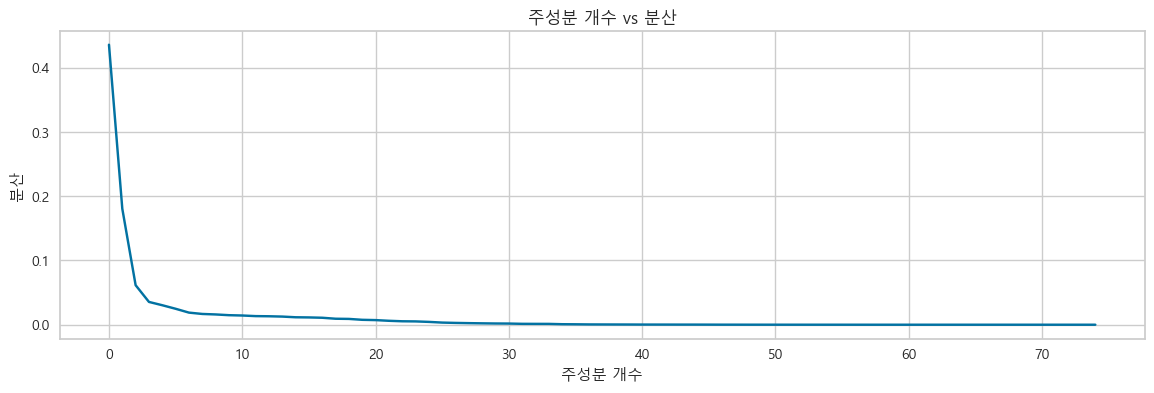

0.7439227088531497


,PC1,PC2,PC3,PC4
0,-2.815,0.964,-0.718,0.732
1,-0.688,0.104,0.535,-1.325
2,-2.450,0.011,0.188,0.291
3,-3.350,1.141,0.603,0.269
4,-1.955,4.688,-0.050,-0.786
...,...,...,...,...
1027,-3.633,3.206,-0.683,0.018
1028,-3.200,3.021,-0.202,-0.191
1029,-4.093,2.772,-0.167,0.100
1030,-3.110,1.375,-0.611,0.677


In [426]:
pc_df = pca_function(df_hair_shop,4)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

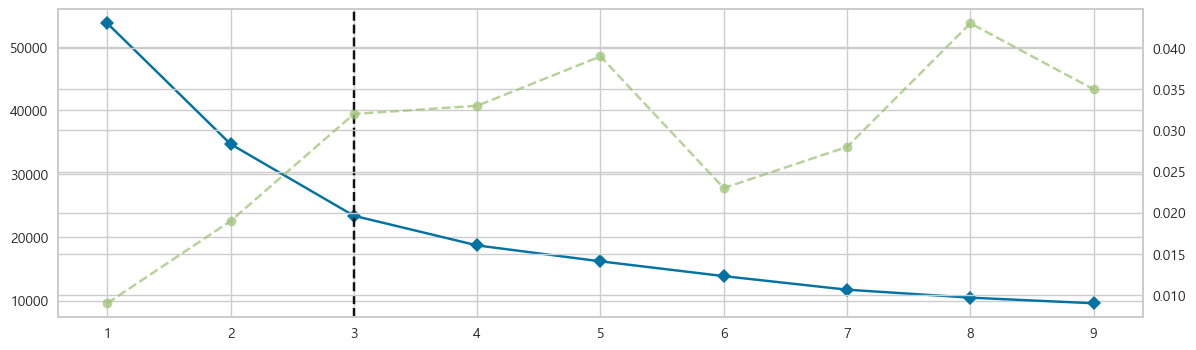

In [427]:
Elbow_function(pc_df)

In [428]:
kmeans_modeling_function(pc_df,3)

cluster
0    800
2    221
1     11
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,cluster
0,-2.815,0.964,-0.718,0.732,0
1,-0.688,0.104,0.535,-1.325,0
2,-2.450,0.011,0.188,0.291,0
3,-3.350,1.141,0.603,0.269,0
4,-1.955,4.688,-0.050,-0.786,0
...,...,...,...,...,...
1027,-3.633,3.206,-0.683,0.018,0
1028,-3.200,3.021,-0.202,-0.191,0
1029,-4.093,2.772,-0.167,0.100,0
1030,-3.110,1.375,-0.611,0.677,0


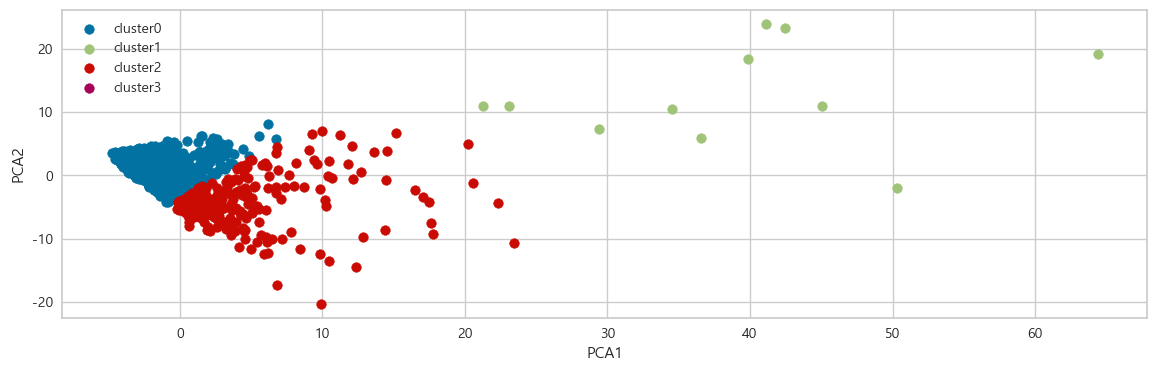

In [429]:
Model_performance_evaluation(pc_df,4)

In [430]:
def df_concat(df):
    df = pd.concat([df.select_dtypes(include=['object']),pc_df['cluster']],axis=1)
    return df

In [432]:
hair_cluster = df_concat(df_hair_shop)
hair_cluster.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,4.19민주묘지역 2번,미용실,0
1,골목상권,GS강동자이아파트,미용실,0
2,골목상권,KB국민은행 망원동지점,미용실,0
3,골목상권,KB국민은행 중화동지점,미용실,0
4,골목상권,KT금천빌딩(금천구시설관리공단),미용실,0


### 3-5-2. 분식전문점

In [436]:
df_school_food = df[df['서비스_업종_코드_명']=='분식전문점']
df_school_food = df_school_food.reset_index(drop=True)
df_school_food.shape

(785, 78)

#### 주성분 분석

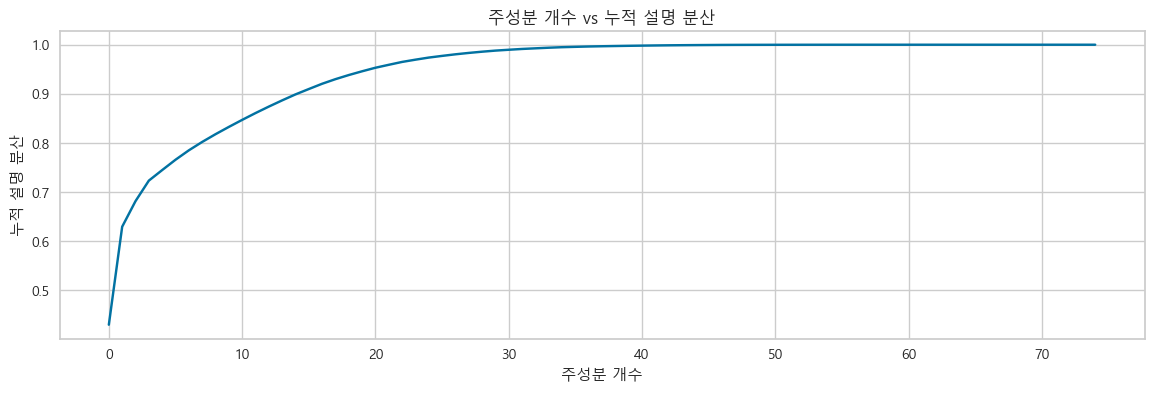

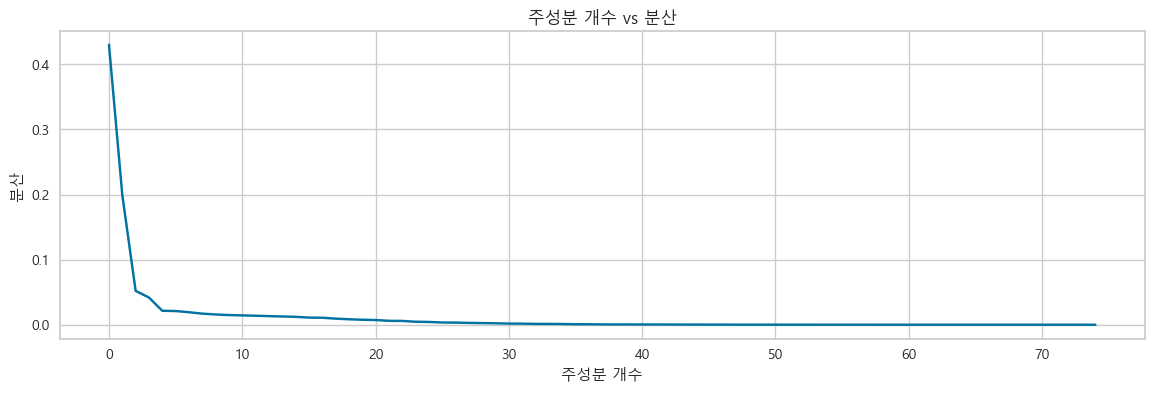

0.7448696843845439


,PC1,PC2,PC3,PC4
0,-2.601,-1.185,0.004,-1.307
1,-3.844,-1.112,0.936,0.613
2,-2.381,-0.246,-0.122,0.099
3,-3.479,-3.775,-0.388,-0.156
4,-3.784,-3.098,-0.317,-0.796
...,...,...,...,...
780,-2.654,-3.122,-0.038,-0.056
781,-2.833,-3.250,0.543,-0.920
782,-2.942,-1.596,-0.382,-0.859
783,-2.930,-2.335,-0.331,-0.425


In [437]:
pc_df = pca_function(df_school_food,4)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

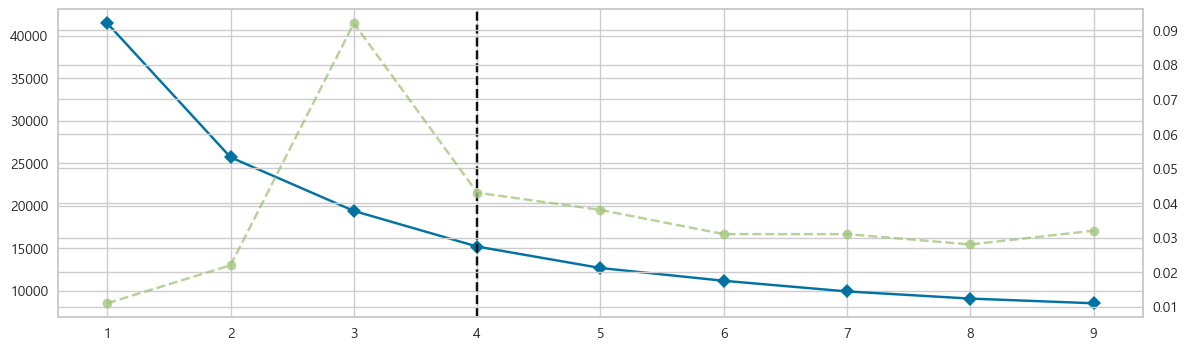

In [438]:
Elbow_function(pc_df)

In [439]:
kmeans_modeling_function(pc_df,4)

cluster
1    550
0    166
3     63
2      6
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,cluster
0,-2.601,-1.185,0.004,-1.307,1
1,-3.844,-1.112,0.936,0.613,1
2,-2.381,-0.246,-0.122,0.099,1
3,-3.479,-3.775,-0.388,-0.156,1
4,-3.784,-3.098,-0.317,-0.796,1
...,...,...,...,...,...
780,-2.654,-3.122,-0.038,-0.056,1
781,-2.833,-3.250,0.543,-0.920,1
782,-2.942,-1.596,-0.382,-0.859,1
783,-2.930,-2.335,-0.331,-0.425,1


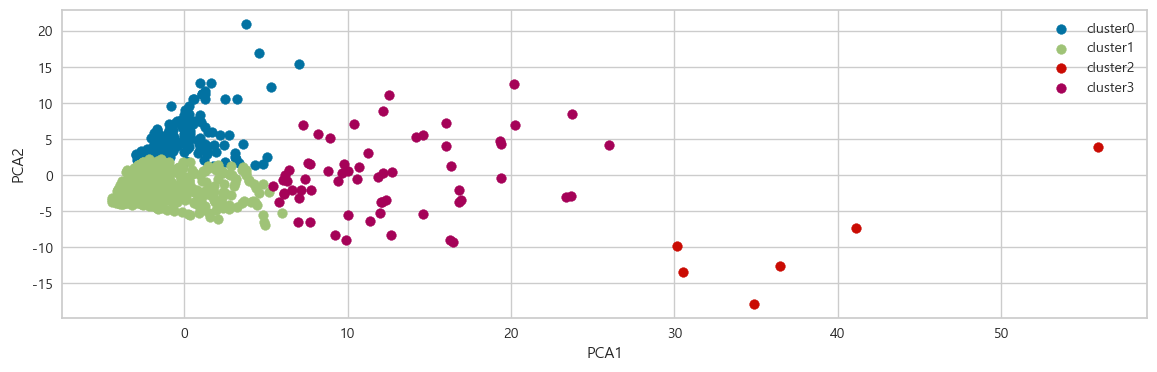

In [440]:
Model_performance_evaluation(pc_df,4)

In [441]:
school_food_cluster = df_concat(df_school_food)
school_food_cluster.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,4.19민주묘지역 2번,분식전문점,1
1,골목상권,G타워,분식전문점,1
2,골목상권,KB국민은행 망원동지점,분식전문점,1
3,골목상권,KT금천빌딩(금천구시설관리공단),분식전문점,1
4,골목상권,KT대방빌딩,분식전문점,1


### 3-5-3. 한식음식점

In [442]:
df_korean_food = df[df['서비스_업종_코드_명']=='한식음식점']
df_korean_food = df_korean_food.reset_index(drop=True)
df_korean_food.shape

(1345, 78)

#### 주성분 분석

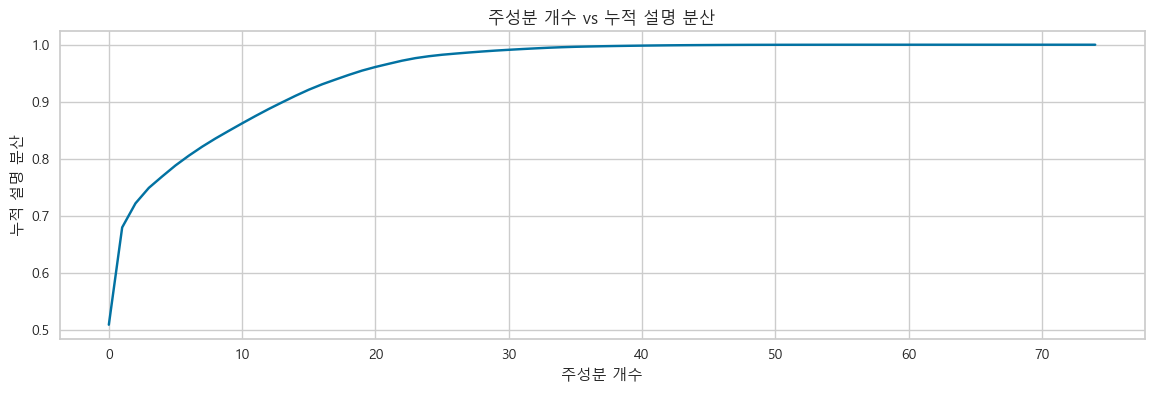

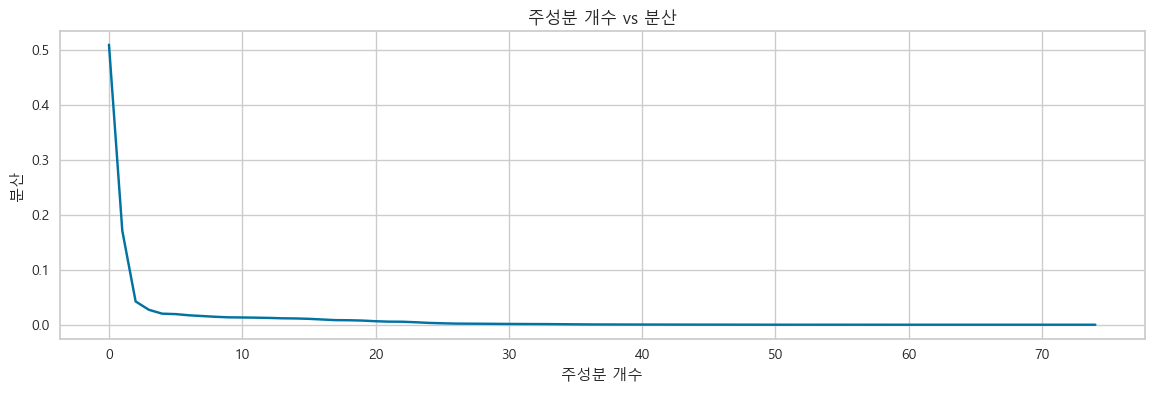

0.7689175671497732


,PC1,PC2,PC3,PC4
0,-1.065,-0.809,0.876,-0.764
1,-2.571,1.432,-0.235,0.246
2,-3.589,-0.048,-0.501,1.032
3,-0.484,-0.024,0.009,0.575
4,-4.230,-2.332,0.327,-0.335
...,...,...,...,...
1340,-3.010,-2.419,0.974,0.240
1341,-2.408,-0.189,1.038,-1.488
1342,-2.188,-0.978,0.682,-0.675
1343,-3.289,-1.438,0.492,0.066


In [443]:
pc_df = pca_function(df_korean_food,4)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

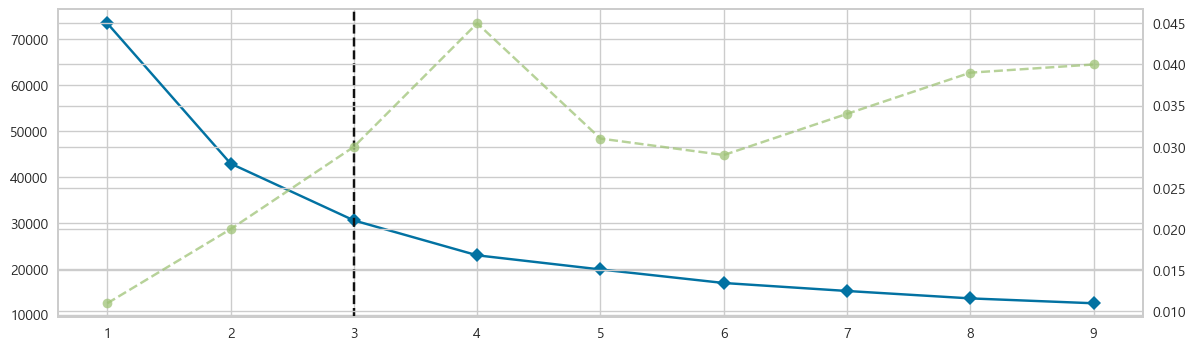

In [444]:
Elbow_function(pc_df)

In [445]:
kmeans_modeling_function(pc_df,3)

cluster
0    953
1    345
2     47
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,cluster
0,-1.065,-0.809,0.876,-0.764,0
1,-2.571,1.432,-0.235,0.246,0
2,-3.589,-0.048,-0.501,1.032,0
3,-0.484,-0.024,0.009,0.575,0
4,-4.230,-2.332,0.327,-0.335,0
...,...,...,...,...,...
1340,-3.010,-2.419,0.974,0.240,0
1341,-2.408,-0.189,1.038,-1.488,0
1342,-2.188,-0.978,0.682,-0.675,0
1343,-3.289,-1.438,0.492,0.066,0


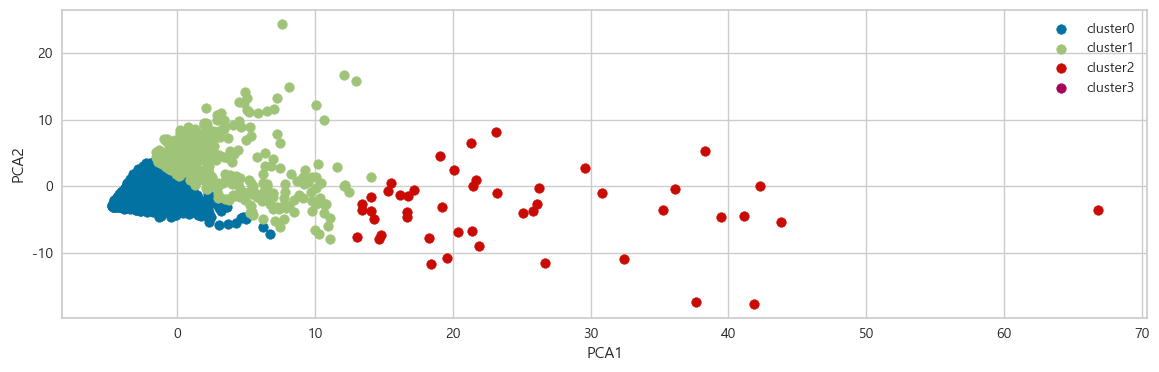

In [446]:
Model_performance_evaluation(pc_df,4)

In [448]:
korean_food_cluster = df_concat(df_korean_food)
korean_food_cluster.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,4.19민주묘지역 2번,한식음식점,0
1,골목상권,GS강동자이아파트,한식음식점,0
2,골목상권,G타워,한식음식점,0
3,골목상권,KB국민은행 망원동지점,한식음식점,0
4,골목상권,KB국민은행 서강지점,한식음식점,0


### 3-5-4. 커피-음료

In [449]:
df_cafe = df[df['서비스_업종_코드_명']=='커피-음료']
df_cafe = df_cafe.reset_index(drop=True)
df_cafe.shape

(952, 78)

#### 주성분 분석

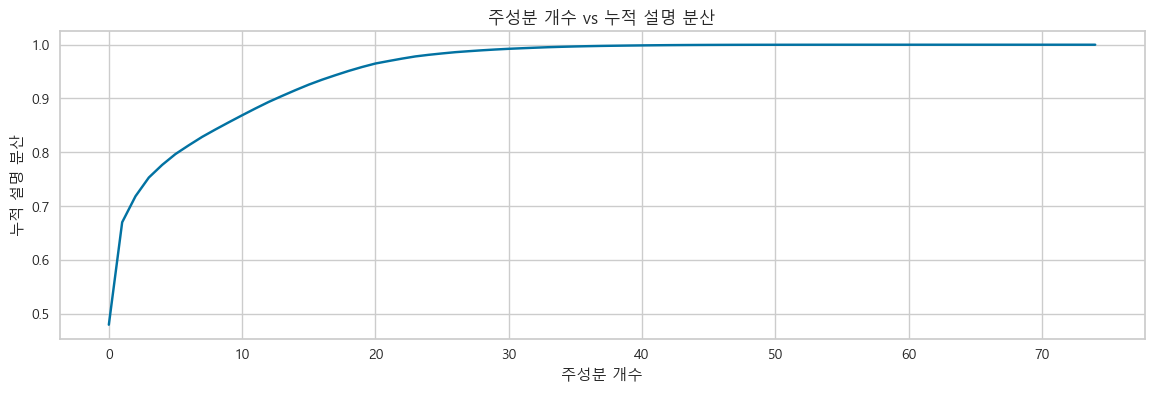

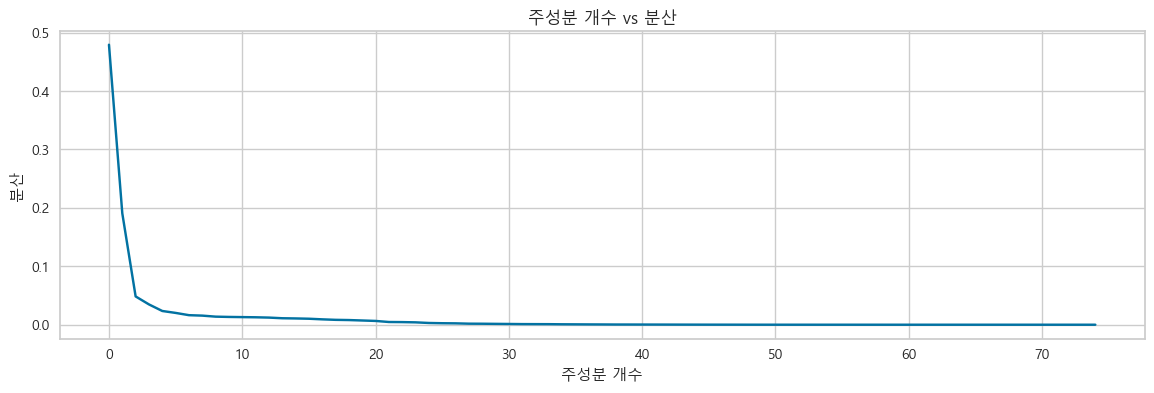

0.7764715111534923


,PC1,PC2,PC3,PC4
0,-1.730,-1.326,-1.314,-0.109
1,-1.238,0.041,0.648,1.123
2,-2.805,-1.089,0.801,1.346
3,-1.894,-0.334,0.119,0.206
4,-1.916,-3.843,-0.270,0.566
...,...,...,...,...
947,2.372,-4.067,-3.539,3.069
948,-3.712,-3.145,-0.678,-0.327
949,-3.059,-3.016,-0.272,0.135
950,-3.344,-2.975,-0.744,0.323


In [450]:
pc_df = pca_function(df_cafe,4)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

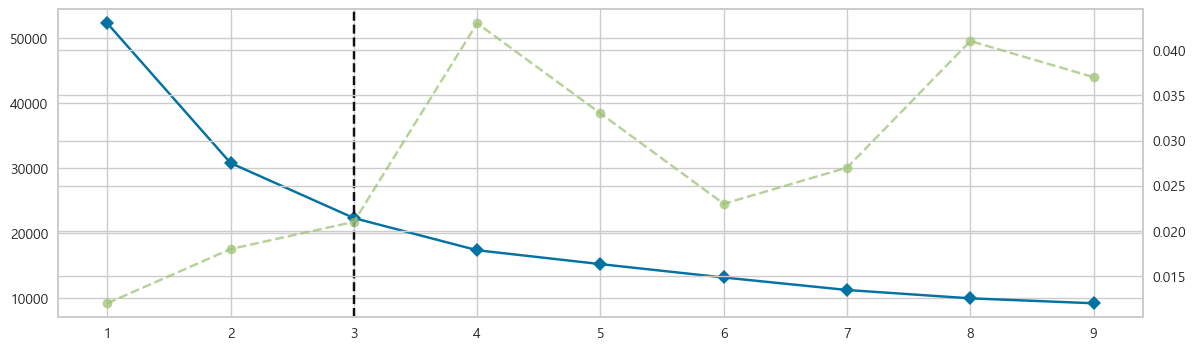

In [451]:
Elbow_function(pc_df)

In [452]:
kmeans_modeling_function(pc_df,3)

cluster
1    668
0    249
2     35
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,cluster
0,-1.730,-1.326,-1.314,-0.109,1
1,-1.238,0.041,0.648,1.123,1
2,-2.805,-1.089,0.801,1.346,1
3,-1.894,-0.334,0.119,0.206,1
4,-1.916,-3.843,-0.270,0.566,1
...,...,...,...,...,...
947,2.372,-4.067,-3.539,3.069,1
948,-3.712,-3.145,-0.678,-0.327,1
949,-3.059,-3.016,-0.272,0.135,1
950,-3.344,-2.975,-0.744,0.323,1


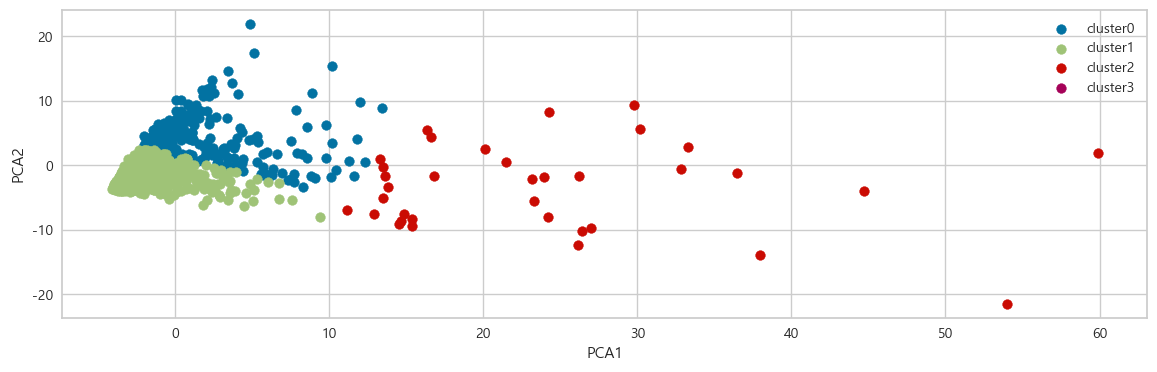

In [453]:
Model_performance_evaluation(pc_df,4)

In [454]:
cafe_cluster = df_concat(df_cafe)
cafe_cluster.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,4.19민주묘지역 2번,커피-음료,1
1,골목상권,GS강동자이아파트,커피-음료,1
2,골목상권,G타워,커피-음료,1
3,골목상권,KB국민은행 망원동지점,커피-음료,1
4,골목상권,KB국민은행 서강지점,커피-음료,1


### 3-5-5. 편의점

In [455]:
df_store = df[df['서비스_업종_코드_명']=='편의점']
df_store = df_store.reset_index(drop=True)
df_store.shape

(868, 78)

#### 주성분 분석

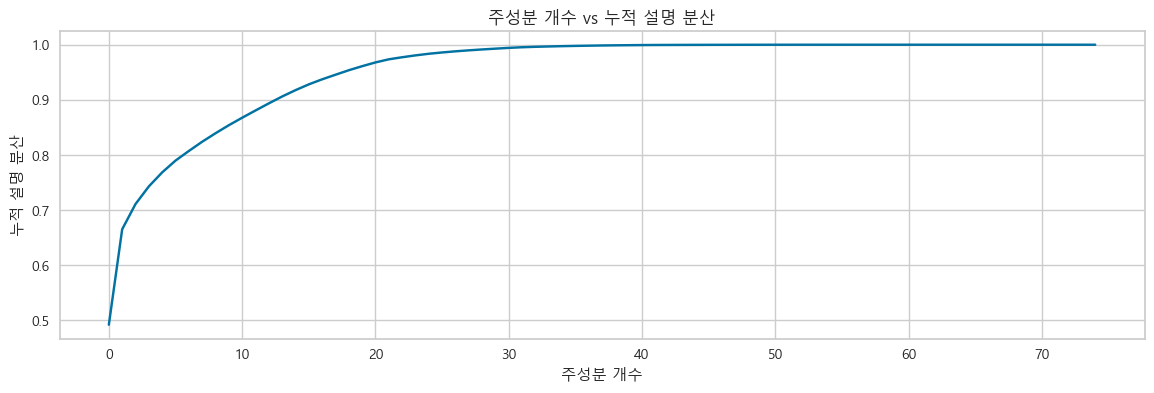

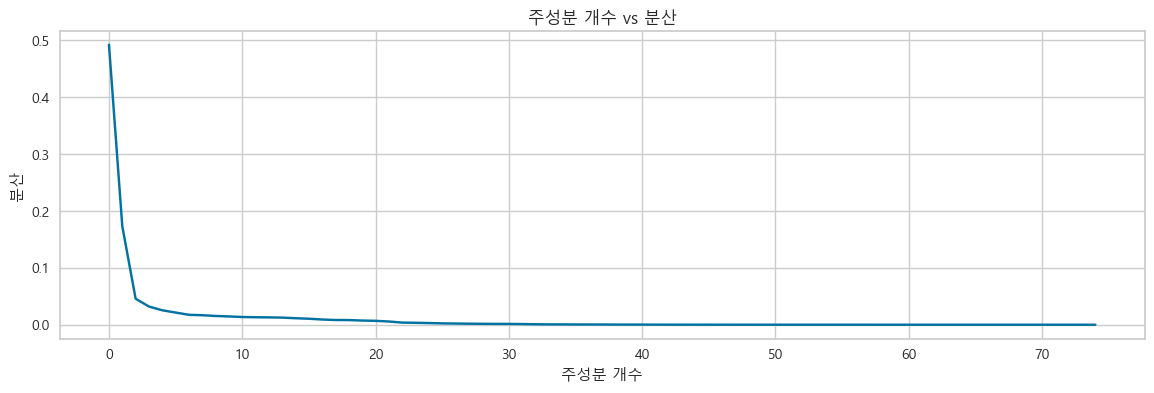

0.7430986270743369


,PC1,PC2,PC3
0,-3.387,1.175,-0.988
1,-2.821,-0.024,0.816
2,-2.111,1.857,1.411
3,-2.957,0.144,-1.423
4,-2.993,0.101,1.051
...,...,...,...
863,1.167,3.726,-1.186
864,-2.339,2.959,-1.312
865,-3.804,0.932,-1.564
866,-4.162,2.366,-0.619


In [458]:
pc_df = pca_function(df_store,3)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

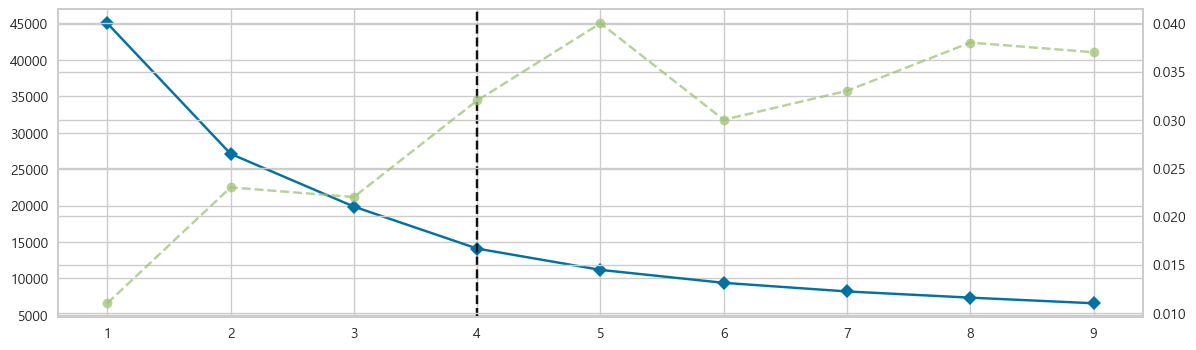

In [459]:
Elbow_function(pc_df)

In [460]:
kmeans_modeling_function(pc_df,4)

cluster
0    584
2    204
1     76
3      4
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,cluster
0,-3.387,1.175,-0.988,0
1,-2.821,-0.024,0.816,0
2,-2.111,1.857,1.411,0
3,-2.957,0.144,-1.423,0
4,-2.993,0.101,1.051,0
...,...,...,...,...
863,1.167,3.726,-1.186,0
864,-2.339,2.959,-1.312,0
865,-3.804,0.932,-1.564,0
866,-4.162,2.366,-0.619,0


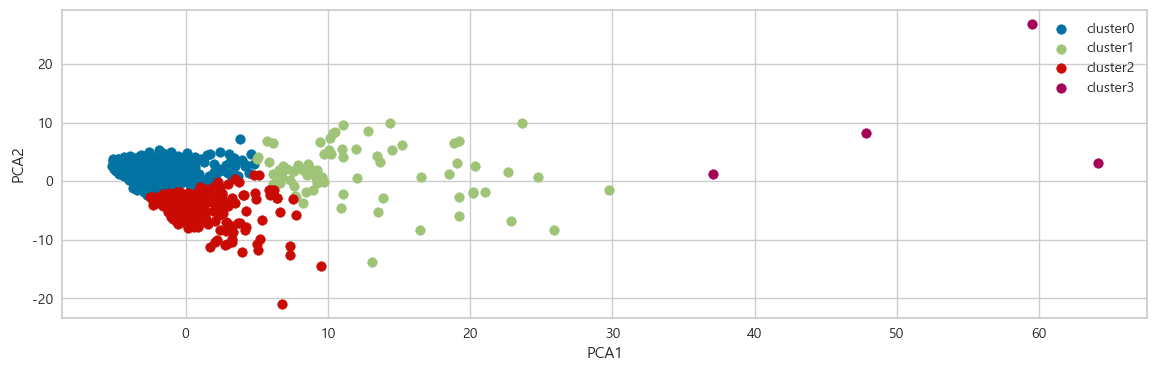

In [461]:
Model_performance_evaluation(pc_df,4)

In [462]:
store_cluster = df_concat(df_store)
store_cluster.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,4.19민주묘지역 2번,편의점,0
1,골목상권,GS강동자이아파트,편의점,0
2,골목상권,G타워,편의점,0
3,골목상권,KT월곡지사,편의점,0
4,골목상권,NH농협은행 보광동지점,편의점,0


### 3-5-6. 일반의류

In [463]:
df_clothes = df[df['서비스_업종_코드_명']=='일반의류']
df_clothes = df_clothes.reset_index(drop=True)
df_clothes.shape

(798, 78)

#### 주성분 분석

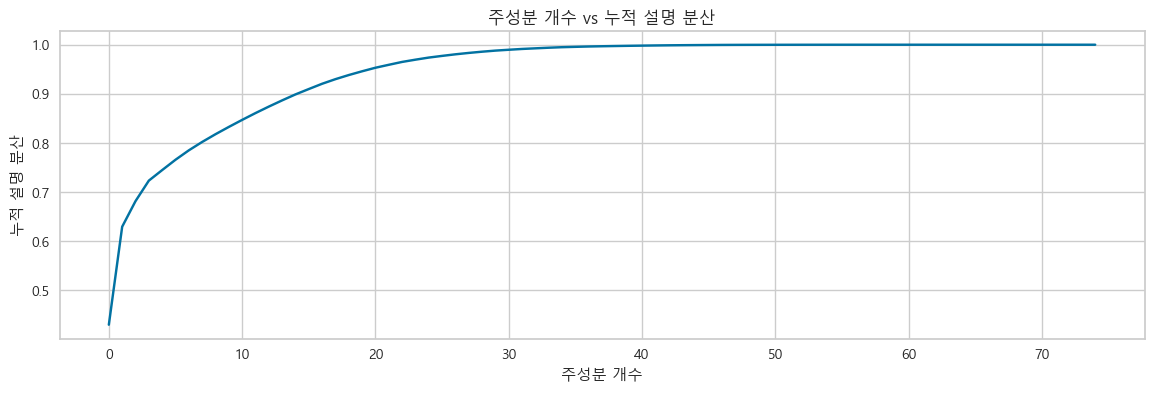

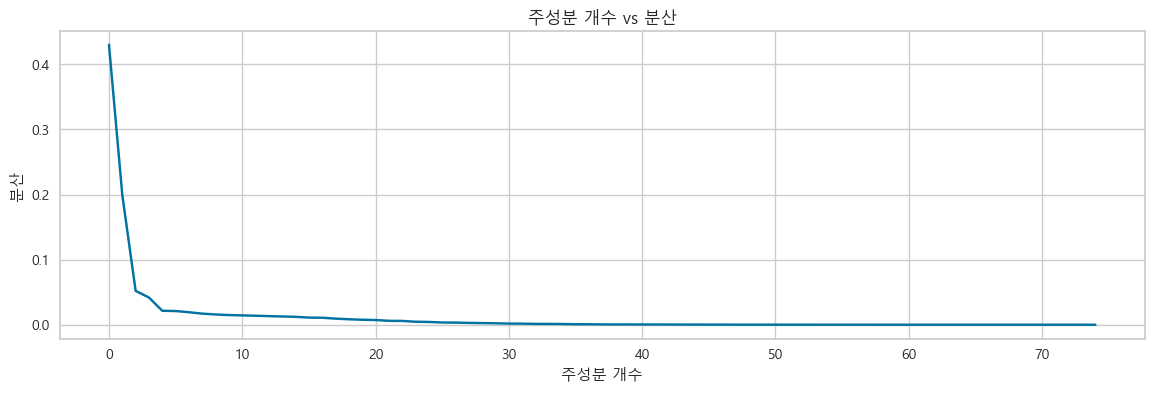

0.7448696843845439


,PC1,PC2,PC3,PC4
0,-2.601,-1.185,0.004,-1.307
1,-3.844,-1.112,0.936,0.613
2,-2.381,-0.246,-0.122,0.099
3,-3.479,-3.775,-0.388,-0.156
4,-3.784,-3.098,-0.317,-0.796
...,...,...,...,...
780,-2.654,-3.122,-0.038,-0.056
781,-2.833,-3.250,0.543,-0.920
782,-2.942,-1.596,-0.382,-0.859
783,-2.930,-2.335,-0.331,-0.425


In [466]:
pc_df = pca_function(df_school_food,4)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

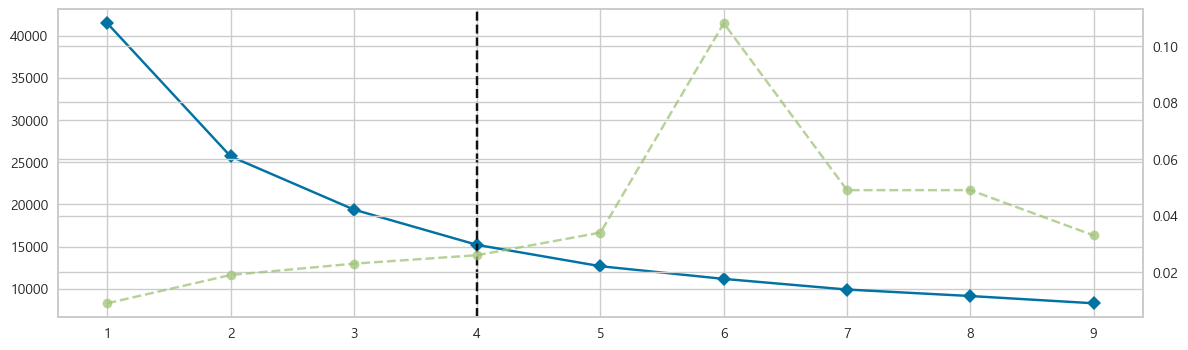

In [467]:
Elbow_function(pc_df)

In [468]:
kmeans_modeling_function(pc_df,4)

cluster
1    550
0    166
3     63
2      6
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,cluster
0,-2.601,-1.185,0.004,-1.307,1
1,-3.844,-1.112,0.936,0.613,1
2,-2.381,-0.246,-0.122,0.099,1
3,-3.479,-3.775,-0.388,-0.156,1
4,-3.784,-3.098,-0.317,-0.796,1
...,...,...,...,...,...
780,-2.654,-3.122,-0.038,-0.056,1
781,-2.833,-3.250,0.543,-0.920,1
782,-2.942,-1.596,-0.382,-0.859,1
783,-2.930,-2.335,-0.331,-0.425,1


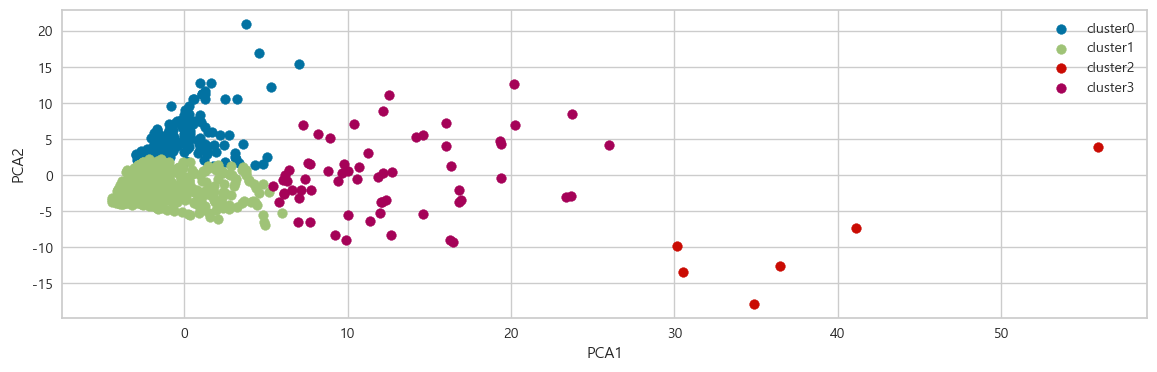

In [469]:
Model_performance_evaluation(pc_df,4)

In [470]:
clothes_cluster = df_concat(df_clothes)
clothes_cluster.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,GS강동자이아파트,일반의류,1.000
1,골목상권,KB국민은행 망원동지점,일반의류,1.000
2,골목상권,NH농협은행 보광동지점,일반의류,1.000
3,골목상권,NH농협은행 상도동지점,일반의류,1.000
4,골목상권,가산동주민센터,일반의류,1.000


### 3-5-7. 호프-간이주점

In [471]:
df_pub = df[df['서비스_업종_코드_명']=='호프-간이주점']
df_pub = df_pub.reset_index(drop=True)
df_pub.shape

(664, 78)

#### 주성분 분석

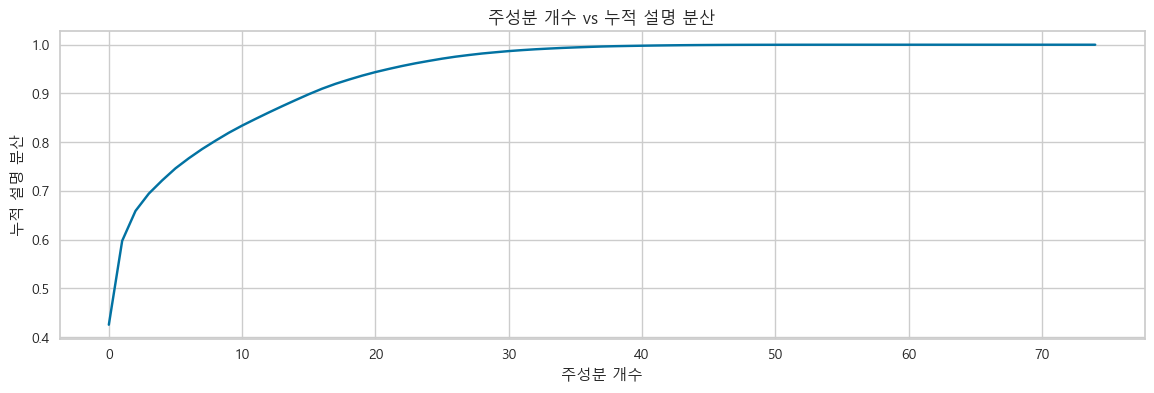

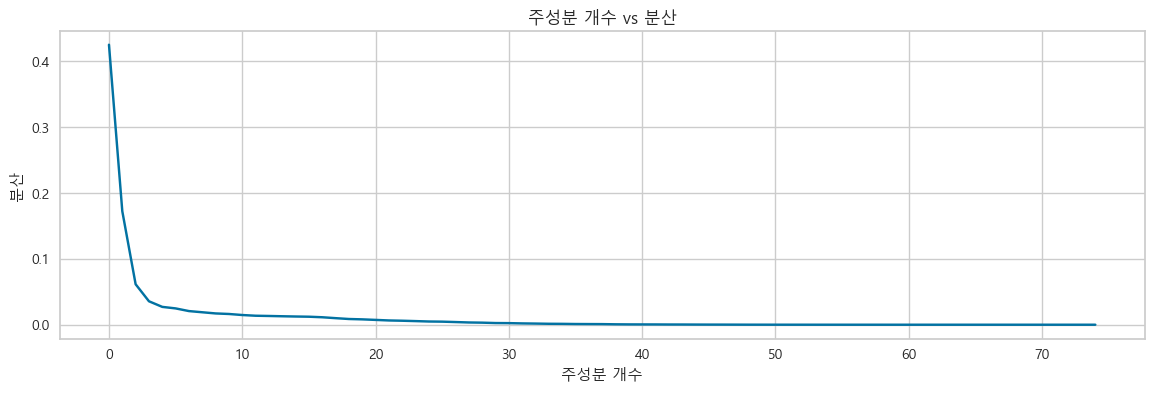

0.7214015966234363


,PC1,PC2,PC3,PC4
0,-2.715,0.203,0.797,-0.005
1,-2.446,-0.453,0.659,-0.413
2,-4.118,-2.957,0.606,0.035
3,-3.040,-1.416,0.364,0.177
4,-2.000,-1.283,0.087,-1.097
...,...,...,...,...
659,-2.234,-1.453,0.153,-0.466
660,2.917,-5.070,2.597,0.591
661,1.826,-5.019,3.338,-0.230
662,-3.332,-3.411,0.433,-0.364


In [474]:
pc_df = pca_function(df_pub,4)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

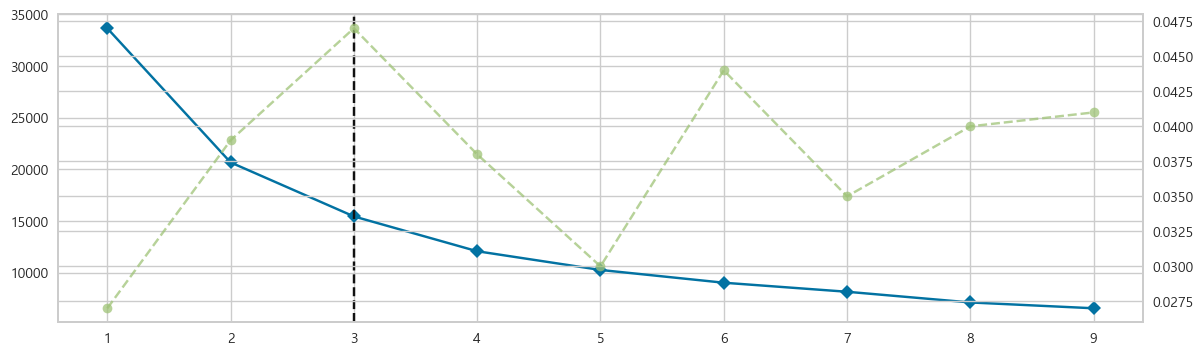

In [475]:
Elbow_function(pc_df)

In [476]:
kmeans_modeling_function(pc_df,3)

cluster
0    452
1    178
2     34
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,cluster
0,-2.715,0.203,0.797,-0.005,0
1,-2.446,-0.453,0.659,-0.413,0
2,-4.118,-2.957,0.606,0.035,0
3,-3.040,-1.416,0.364,0.177,0
4,-2.000,-1.283,0.087,-1.097,0
...,...,...,...,...,...
659,-2.234,-1.453,0.153,-0.466,0
660,2.917,-5.070,2.597,0.591,0
661,1.826,-5.019,3.338,-0.230,0
662,-3.332,-3.411,0.433,-0.364,0


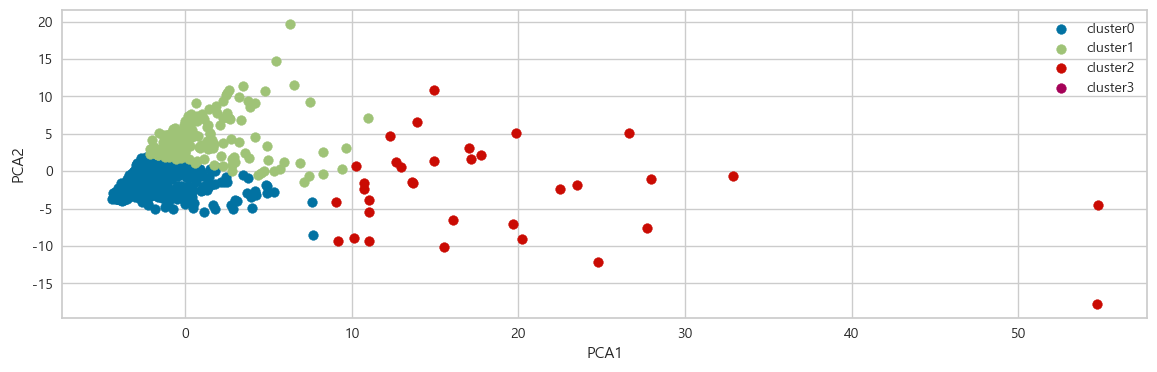

In [477]:
Model_performance_evaluation(pc_df,4)

In [478]:
pub_cluster = df_concat(df_pub)
pub_cluster.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,GS강동자이아파트,호프-간이주점,0
1,골목상권,KB국민은행 망원동지점,호프-간이주점,0
2,골목상권,KT&G 북부지사,호프-간이주점,0
3,골목상권,NH농협은행 상도동지점,호프-간이주점,0
4,골목상권,가산동우체국,호프-간이주점,0


### 3-5-8. 의약품

In [479]:
df_medic = df[df['서비스_업종_코드_명']=='의약품']
df_medic = df_medic.reset_index(drop=True)
df_medic.shape

(629, 78)

#### 주성분 분석

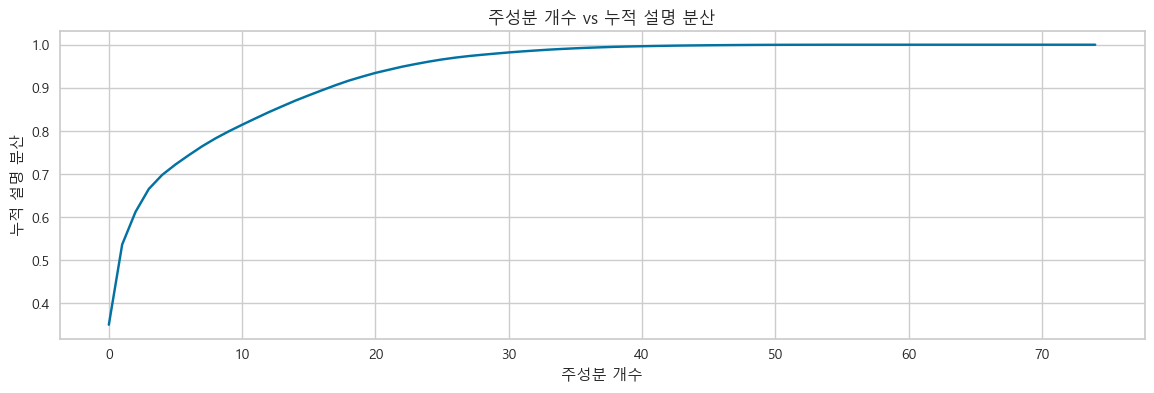

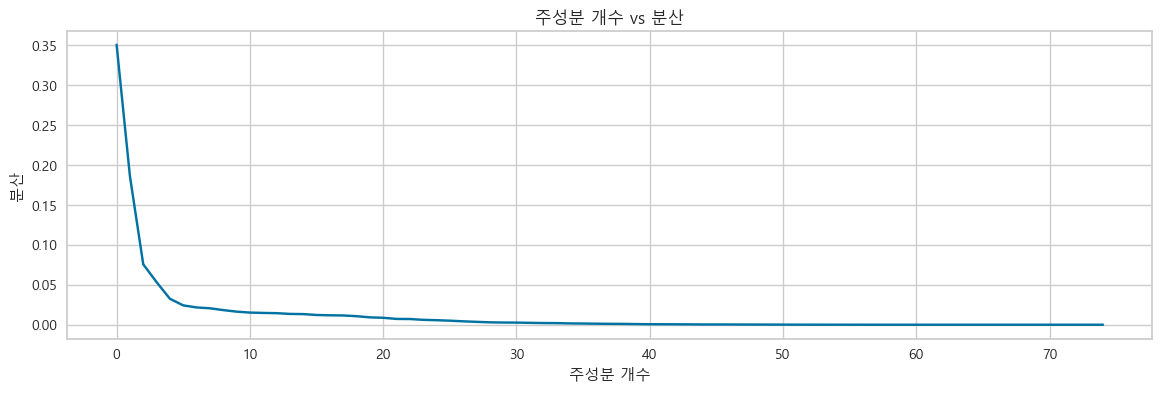

0.6980476638077926


,PC1,PC2,PC3,PC4
0,-4.694,-2.399,-0.437,0.551
1,-3.723,0.780,-0.393,1.230
2,-3.179,0.288,0.508,-1.100
3,-3.293,-1.133,-0.405,-0.741
4,-3.768,-0.136,-0.290,1.546
...,...,...,...,...
624,-4.267,-2.735,-0.452,0.354
625,-3.464,-2.841,-0.378,-0.492
626,-4.099,-2.392,-0.599,-0.089
627,-4.608,-1.409,-0.460,0.674


In [481]:
pc_df = pca_function(df_medic,4)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

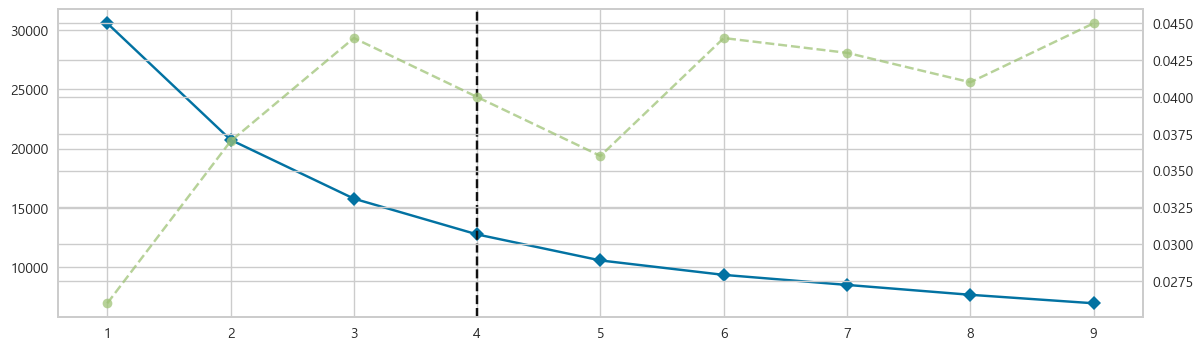

In [482]:
Elbow_function(pc_df)

In [483]:
kmeans_modeling_function(pc_df,4)

cluster
1    364
0    127
3    105
2     33
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,cluster
0,-4.694,-2.399,-0.437,0.551,1
1,-3.723,0.780,-0.393,1.230,1
2,-3.179,0.288,0.508,-1.100,1
3,-3.293,-1.133,-0.405,-0.741,1
4,-3.768,-0.136,-0.290,1.546,1
...,...,...,...,...,...
624,-4.267,-2.735,-0.452,0.354,1
625,-3.464,-2.841,-0.378,-0.492,1
626,-4.099,-2.392,-0.599,-0.089,1
627,-4.608,-1.409,-0.460,0.674,1


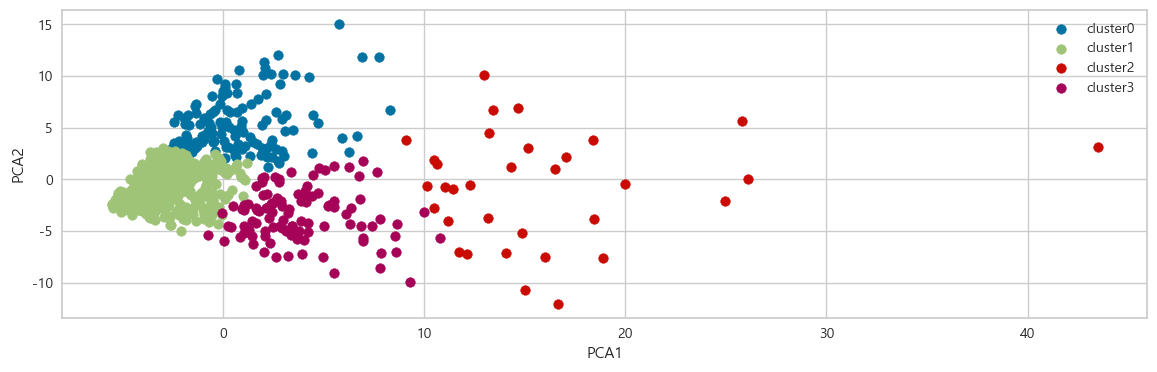

In [484]:
Model_performance_evaluation(pc_df,4)

In [485]:
df_medic = df_concat(df_medic)
df_medic.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,KT대방빌딩,의약품,1
1,골목상권,KT월곡지사,의약품,1
2,골목상권,NH농협은행 보광동지점,의약품,1
3,골목상권,NH농협은행 상도동지점,의약품,1
4,골목상권,가산동우체국,의약품,1


### 3-5-9. 일반교습학원

In [486]:
df_academy = df[df['서비스_업종_코드_명']=='일반교습학원']
df_academy = df_academy.reset_index(drop=True)
df_academy.shape

(564, 78)

#### 주성분 분석

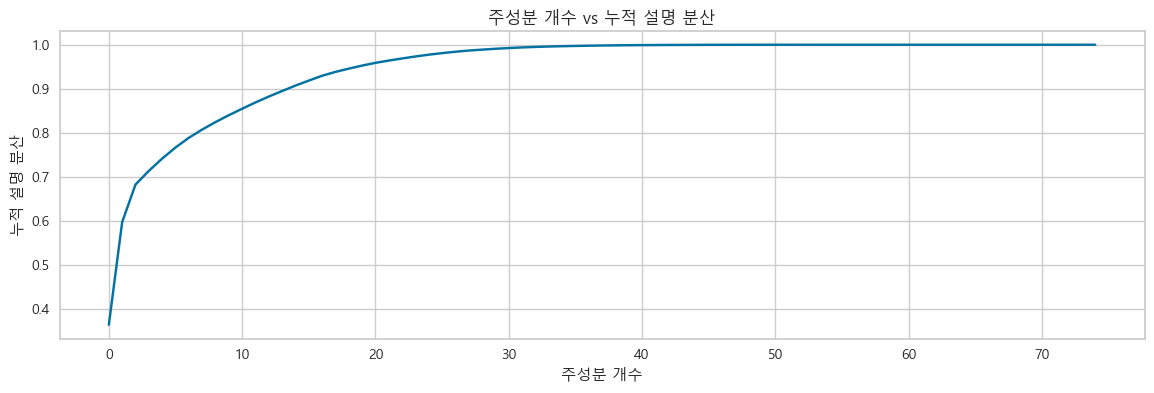

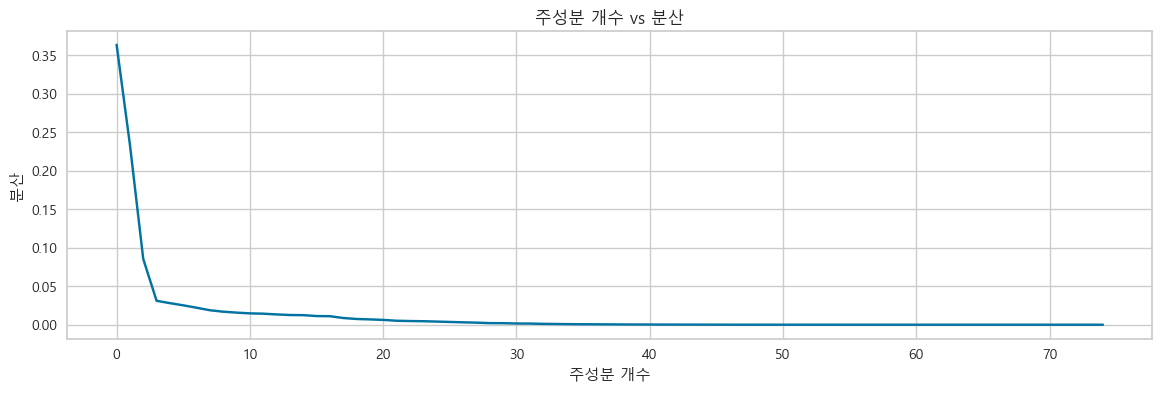

0.7411008071092935


,PC1,PC2,PC3,PC4
0,-1.491,-1.223,-0.705,0.375
1,-1.615,-4.382,0.767,-0.205
2,-1.850,-4.773,1.146,0.166
3,-1.921,-4.209,1.101,0.186
4,-1.850,-1.459,-0.978,0.652
...,...,...,...,...
559,-1.654,-3.659,0.552,0.457
560,-1.773,-4.096,0.563,0.218
561,-1.709,-3.232,1.266,0.096
562,-1.418,-3.400,0.818,0.206


In [488]:
pc_df = pca_function(df_academy,4)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

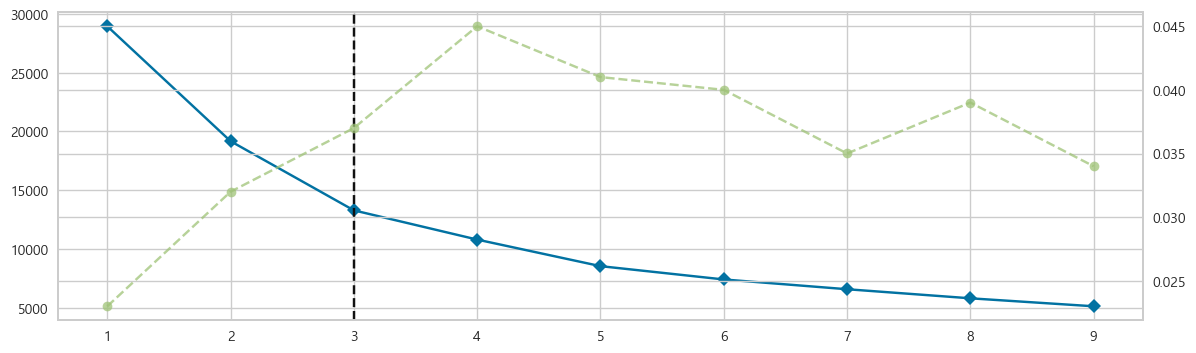

In [489]:
Elbow_function(pc_df)

In [490]:
kmeans_modeling_function(pc_df,3)

cluster
0    419
1    133
2     12
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,cluster
0,-1.491,-1.223,-0.705,0.375,0
1,-1.615,-4.382,0.767,-0.205,0
2,-1.850,-4.773,1.146,0.166,0
3,-1.921,-4.209,1.101,0.186,0
4,-1.850,-1.459,-0.978,0.652,0
...,...,...,...,...,...
559,-1.654,-3.659,0.552,0.457,0
560,-1.773,-4.096,0.563,0.218,0
561,-1.709,-3.232,1.266,0.096,0
562,-1.418,-3.400,0.818,0.206,0


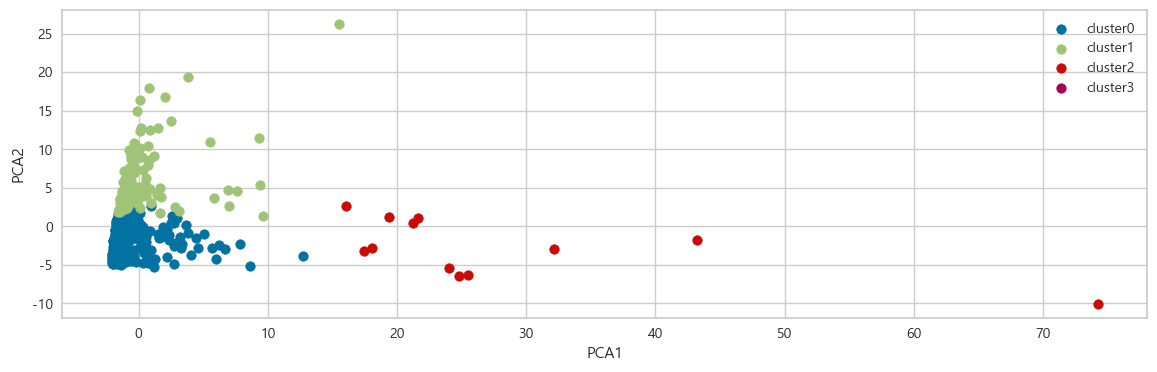

In [491]:
Model_performance_evaluation(pc_df,4)

In [492]:
df_academy = df_concat(df_academy)
df_academy.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,GS강동자이아파트,일반교습학원,0
1,골목상권,KB국민은행 서강지점,일반교습학원,0
2,골목상권,KT금천빌딩(금천구시설관리공단),일반교습학원,0
3,골목상권,KT대방빌딩,일반교습학원,0
4,골목상권,NH농협은행 보광동지점,일반교습학원,0


### 3-5-10. 치킨전문점

In [493]:
df_chicken = df[df['서비스_업종_코드_명']=='치킨전문점']
df_chicken = df_chicken.reset_index(drop=True)
df_chicken.shape

(529, 78)

#### 주성분 분석

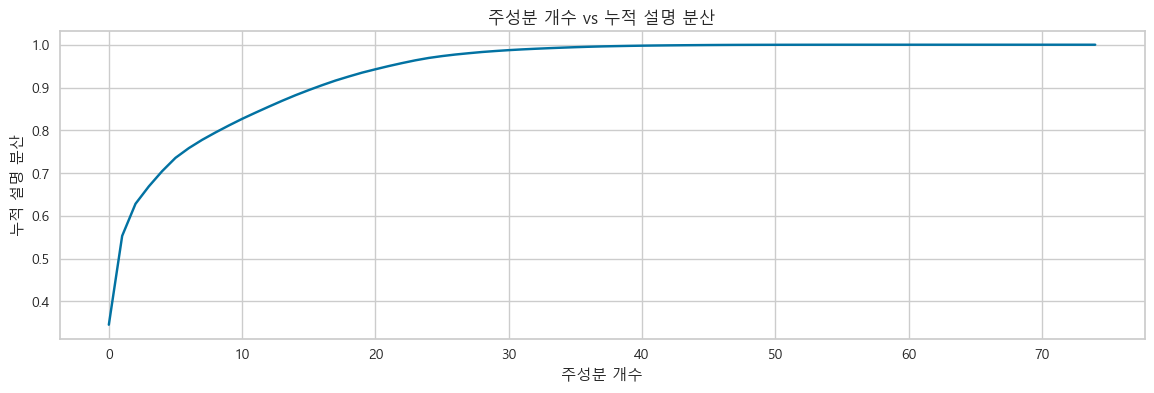

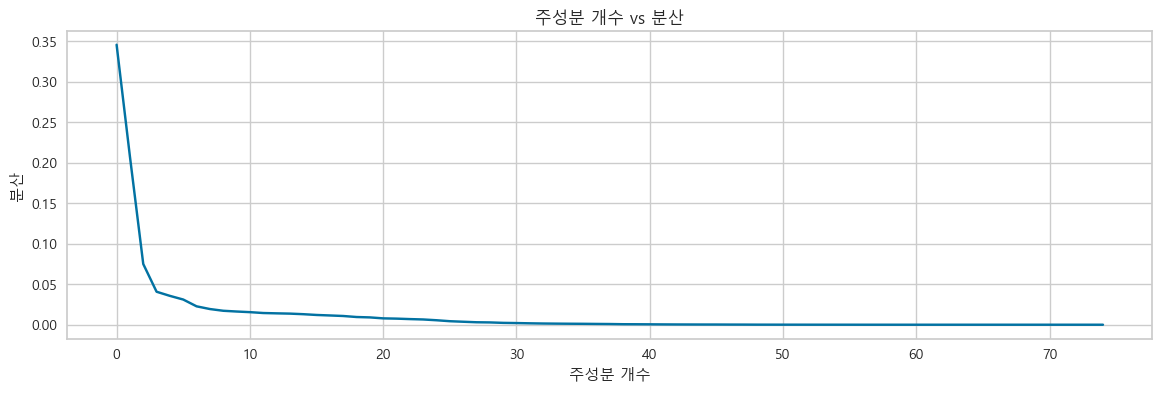

0.7045544115905136


,PC1,PC2,PC3,PC4
0,-3.204,1.559,-0.617,0.362
1,2.066,2.787,2.091,-1.483
2,-2.974,1.015,0.228,0.221
3,-4.289,3.890,-0.829,0.305
4,-3.545,0.607,1.060,-0.330
...,...,...,...,...
524,8.511,7.445,1.100,-4.778
525,-3.855,0.797,-1.214,0.451
526,7.905,7.104,0.617,-5.624
527,-4.092,2.377,-1.217,0.347


In [494]:
pc_df = pca_function(df_chicken,4)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

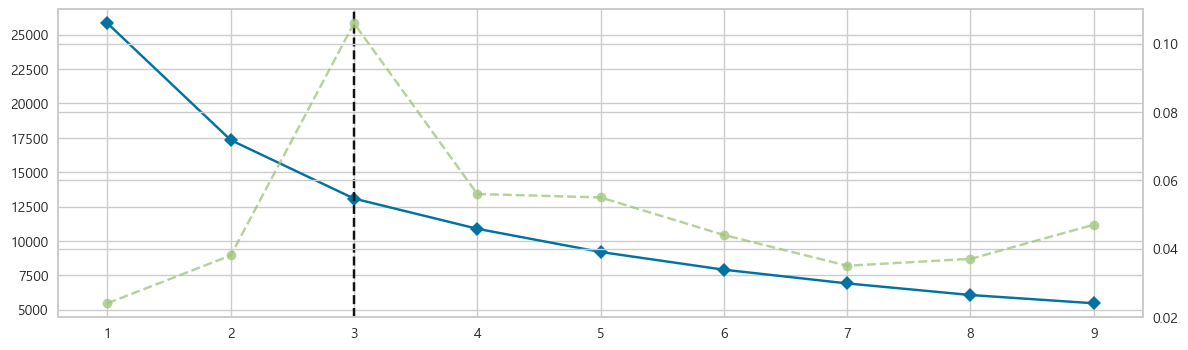

In [495]:
Elbow_function(pc_df)

In [496]:
kmeans_modeling_function(pc_df,3)

cluster
1    344
2    139
0     46
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,cluster
0,-3.204,1.559,-0.617,0.362,1
1,2.066,2.787,2.091,-1.483,1
2,-2.974,1.015,0.228,0.221,1
3,-4.289,3.890,-0.829,0.305,1
4,-3.545,0.607,1.060,-0.330,1
...,...,...,...,...,...
524,8.511,7.445,1.100,-4.778,0
525,-3.855,0.797,-1.214,0.451,1
526,7.905,7.104,0.617,-5.624,0
527,-4.092,2.377,-1.217,0.347,1


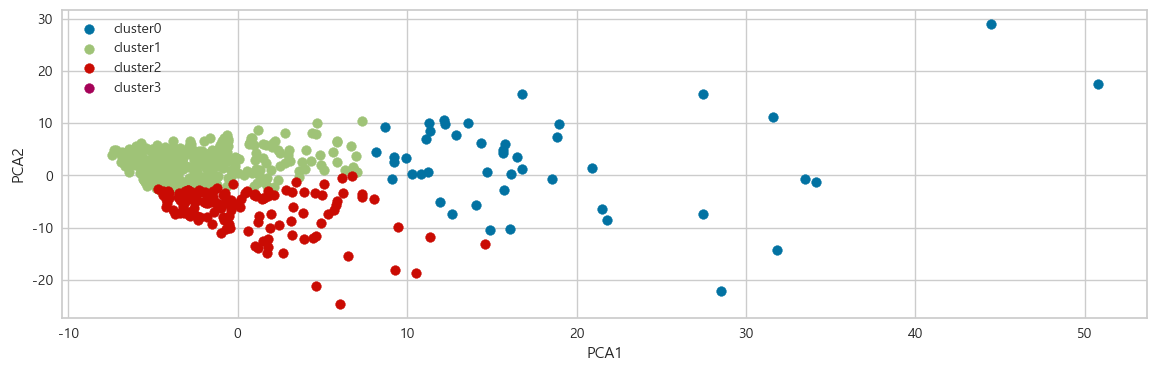

In [498]:
Model_performance_evaluation(pc_df,4)

In [499]:
chicken_cluster = df_concat(df_chicken)
chicken_cluster.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,4.19민주묘지역 2번,치킨전문점,1
1,골목상권,GS강동자이아파트,치킨전문점,1
2,골목상권,KB국민은행 망원동지점,치킨전문점,1
3,골목상권,KT금천빌딩(금천구시설관리공단),치킨전문점,1
4,골목상권,NH농협은행 보광동지점,치킨전문점,1


### 3-5-11. 노래방

In [500]:
df_sing = df[df['서비스_업종_코드_명']=='노래방']
df_sing = df_sing.reset_index(drop=True)
df_sing.shape

(528, 78)

#### 주성분 분석

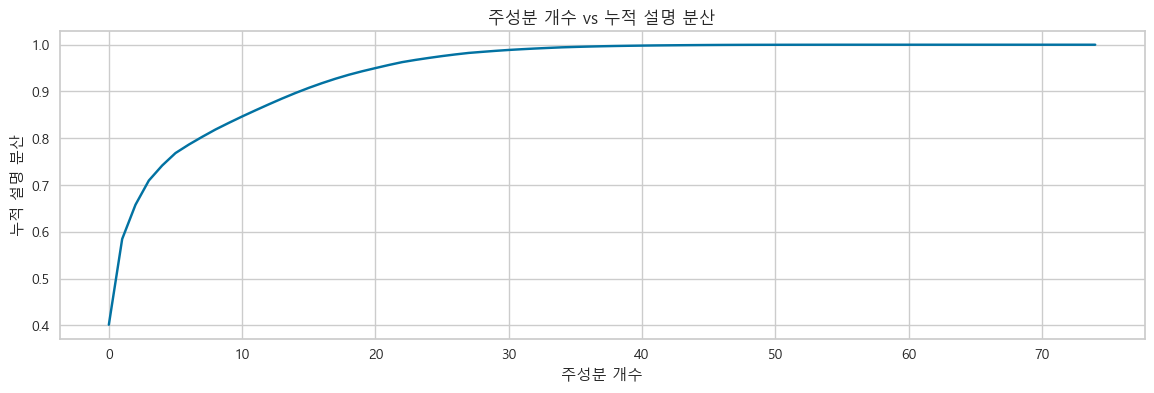

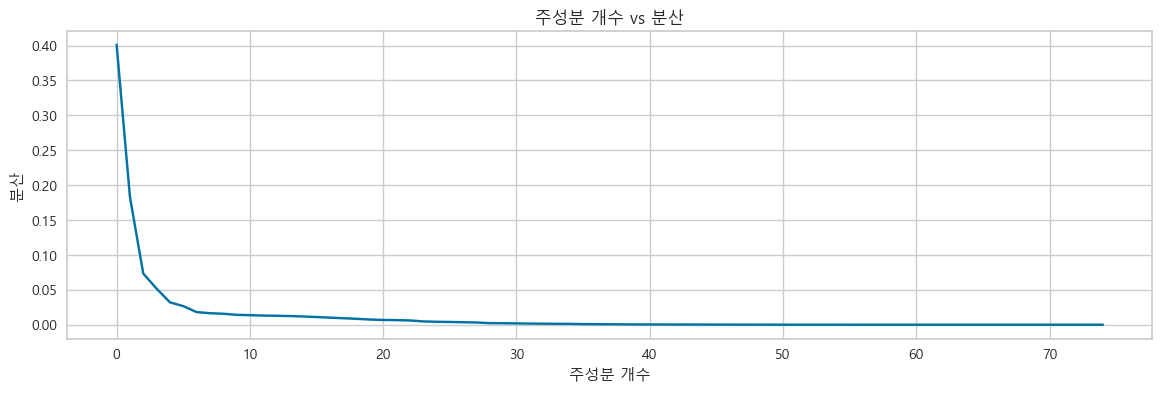

0.7416732583607828


,PC1,PC2,PC3,PC4
0,-2.421,-0.966,0.036,-0.281
1,-4.187,-3.911,0.131,0.552
2,-3.324,-1.717,0.354,-0.117
3,-1.751,-1.826,-0.688,-0.127
4,-3.779,-3.252,-0.578,-0.246
...,...,...,...,...
523,4.549,-6.255,4.314,-0.668
524,-0.480,-2.678,1.095,0.175
525,1.041,-4.472,1.332,-0.559
526,-3.227,-2.915,0.905,1.003


In [501]:
pc_df = pca_function(df_sing,4)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

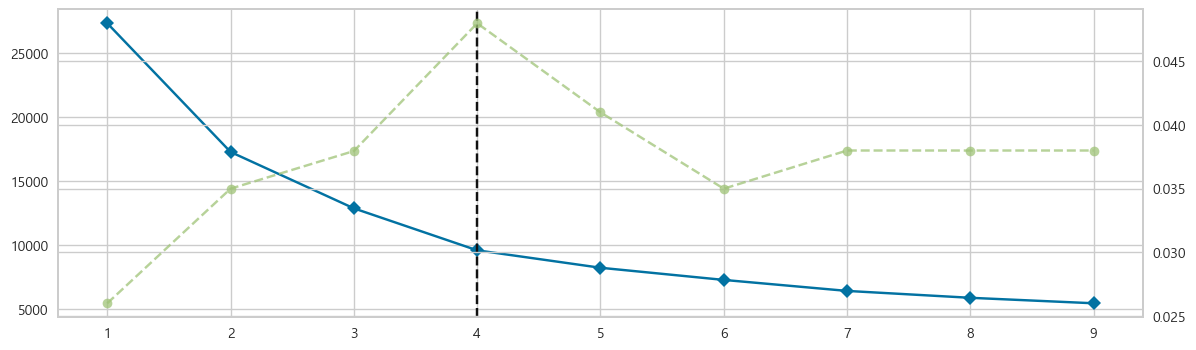

In [502]:
Elbow_function(pc_df)

In [503]:
kmeans_modeling_function(pc_df,4)

cluster
2    335
1    133
0     50
3     10
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,cluster
0,-2.421,-0.966,0.036,-0.281,2
1,-4.187,-3.911,0.131,0.552,2
2,-3.324,-1.717,0.354,-0.117,2
3,-1.751,-1.826,-0.688,-0.127,2
4,-3.779,-3.252,-0.578,-0.246,2
...,...,...,...,...,...
523,4.549,-6.255,4.314,-0.668,2
524,-0.480,-2.678,1.095,0.175,2
525,1.041,-4.472,1.332,-0.559,2
526,-3.227,-2.915,0.905,1.003,2


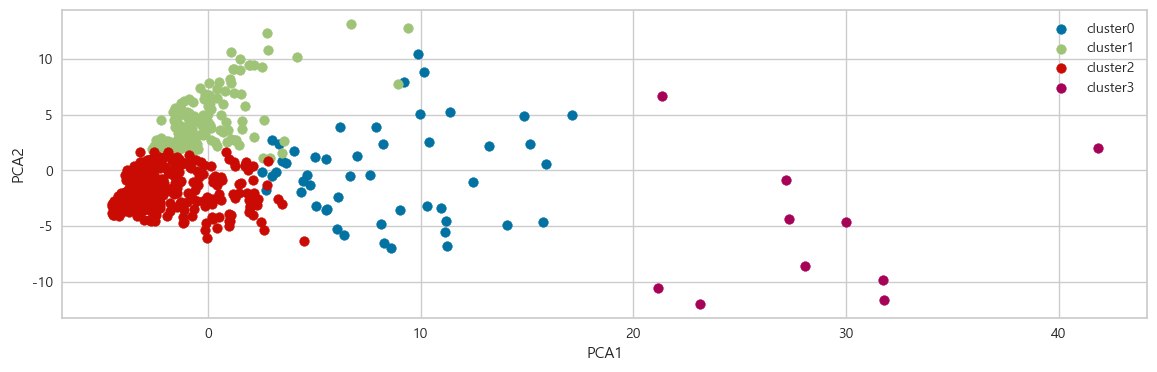

In [504]:
Model_performance_evaluation(pc_df,4)

In [505]:
sing_cluster = df_concat(df_sing)
sing_cluster.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,KB국민은행 망원동지점,노래방,2
1,골목상권,KT금천빌딩(금천구시설관리공단),노래방,2
2,골목상권,NH농협은행 상도동지점,노래방,2
3,골목상권,가산동우체국,노래방,2
4,골목상권,가산동주민센터,노래방,2


### 3-5-12. 일반의원

In [506]:
df_hospital = df[df['서비스_업종_코드_명']=='일반의원']
df_hospital = df_hospital.reset_index(drop=True)
df_hospital.shape

(489, 78)

#### 주성분 분석

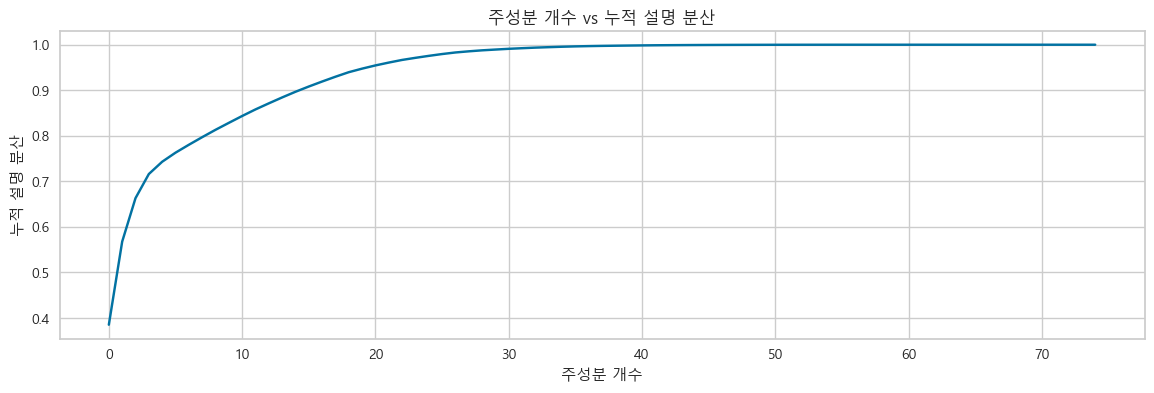

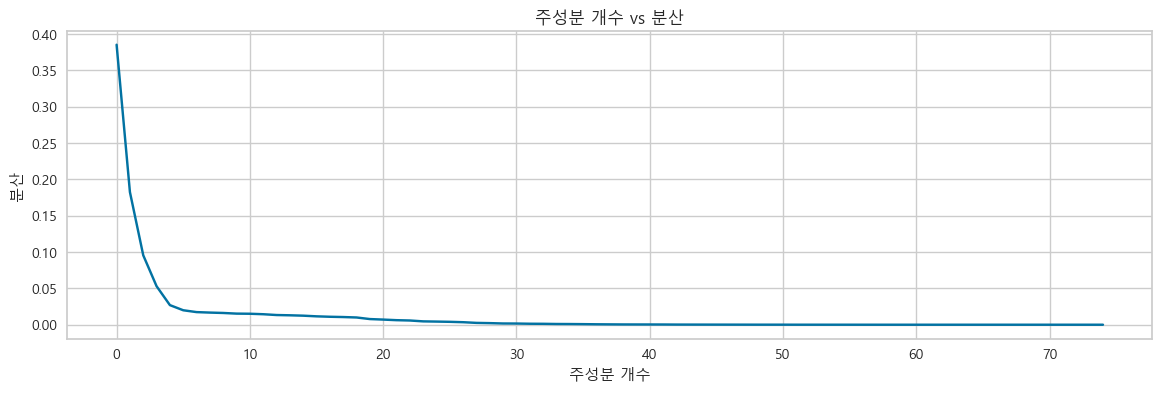

0.7430116151528798


,PC1,PC2,PC3,PC4
0,-2.839,-0.003,0.814,0.638
1,-2.956,0.352,0.632,1.821
2,-3.365,-1.250,0.856,0.571
3,-4.441,-2.620,2.392,0.503
4,-2.985,0.138,1.394,-0.360
...,...,...,...,...
484,-4.455,-2.683,1.951,0.467
485,0.138,-2.511,-0.285,0.679
486,-2.847,-3.559,-0.363,0.173
487,-2.022,-3.805,-1.328,0.619


In [507]:
pc_df = pca_function(df_hospital,4)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

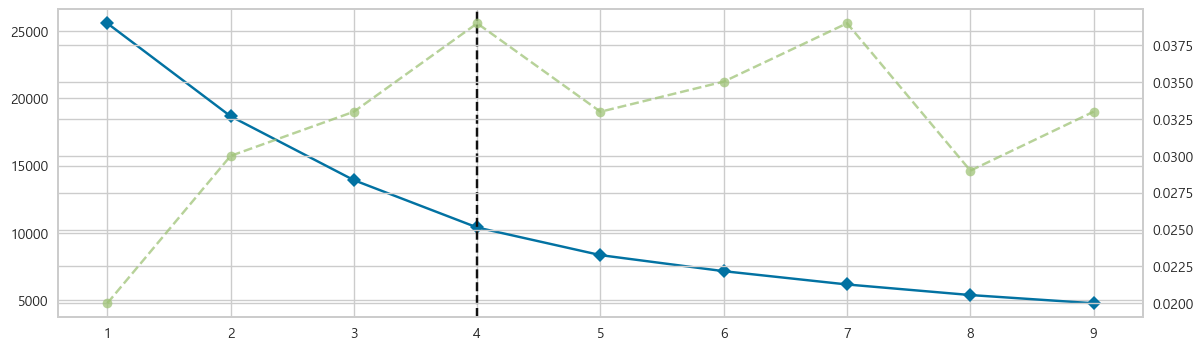

In [508]:
Elbow_function(pc_df)

In [509]:
kmeans_modeling_function(pc_df,4)

cluster
0    318
1    106
3     62
2      3
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,cluster
0,-2.839,-0.003,0.814,0.638,0
1,-2.956,0.352,0.632,1.821,0
2,-3.365,-1.250,0.856,0.571,0
3,-4.441,-2.620,2.392,0.503,0
4,-2.985,0.138,1.394,-0.360,0
...,...,...,...,...,...
484,-4.455,-2.683,1.951,0.467,0
485,0.138,-2.511,-0.285,0.679,0
486,-2.847,-3.559,-0.363,0.173,0
487,-2.022,-3.805,-1.328,0.619,0


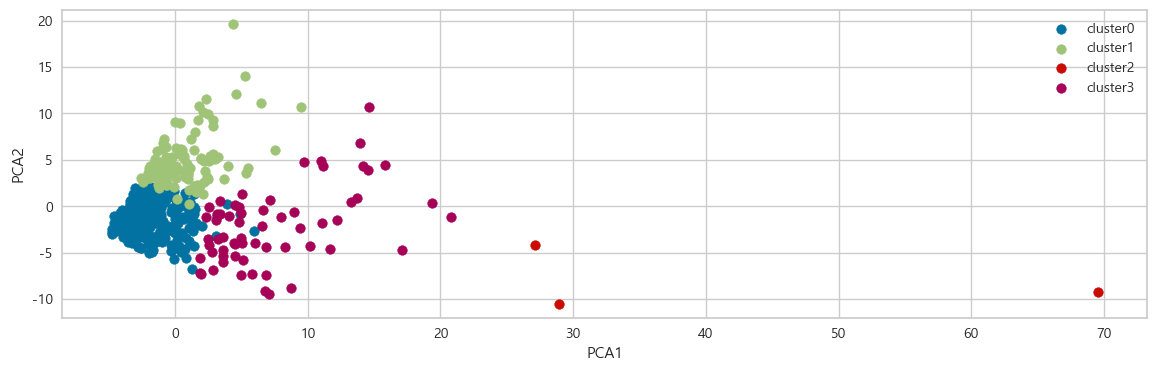

In [510]:
Model_performance_evaluation(pc_df,4)

In [511]:
hospital_cluster = df_concat(df_hospital)
hospital_cluster.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,KB국민은행 망원동지점,일반의원,0
1,골목상권,NH농협은행 보광동지점,일반의원,0
2,골목상권,가산초등학교(세일중학교),일반의원,0
3,골목상권,가양역 10번,일반의원,0
4,골목상권,가오리역 1번,일반의원,0


### 3-5-13. 중식음식점

In [512]:
df_chinese_food = df[df['서비스_업종_코드_명']=='중식음식점']
df_chinese_food = df_chinese_food.reset_index(drop=True)
df_chinese_food.shape

(447, 78)

#### 주성분 분석

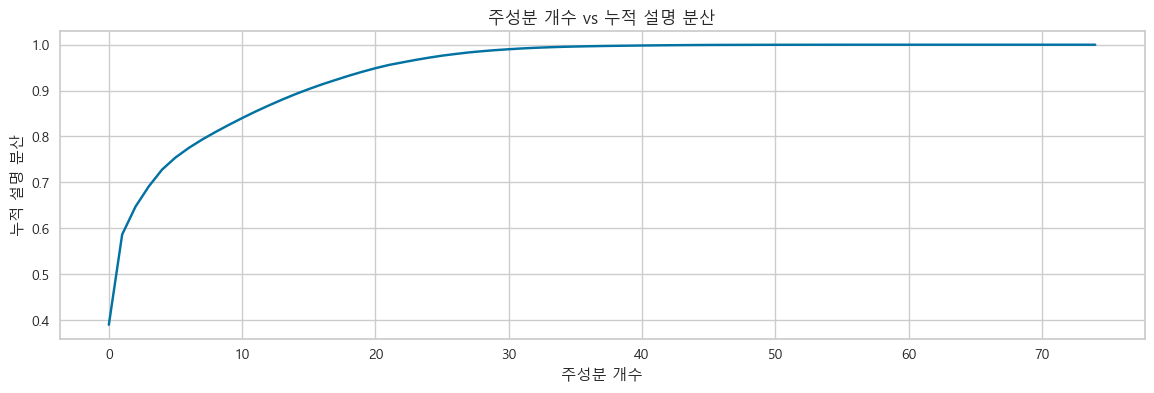

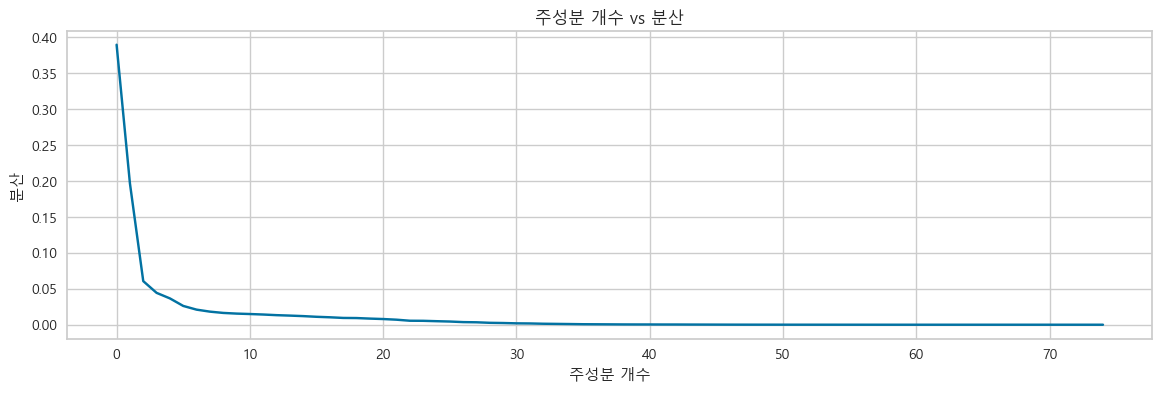

0.7279909425495203


,PC1,PC2,PC3,PC4
0,-2.486,0.727,-0.686,-1.294
1,-2.658,-3.951,0.339,0.196
2,-3.952,-3.136,0.266,-0.702
3,-3.601,-2.068,0.256,0.062
4,1.125,8.822,2.036,1.647
...,...,...,...,...
442,-2.845,1.365,0.612,0.214
443,0.261,-3.696,0.260,-2.592
444,-2.998,-1.608,-0.055,-0.532
445,7.296,-5.922,0.810,-5.724


In [514]:
pc_df = pca_function(df_chinese_food,4)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

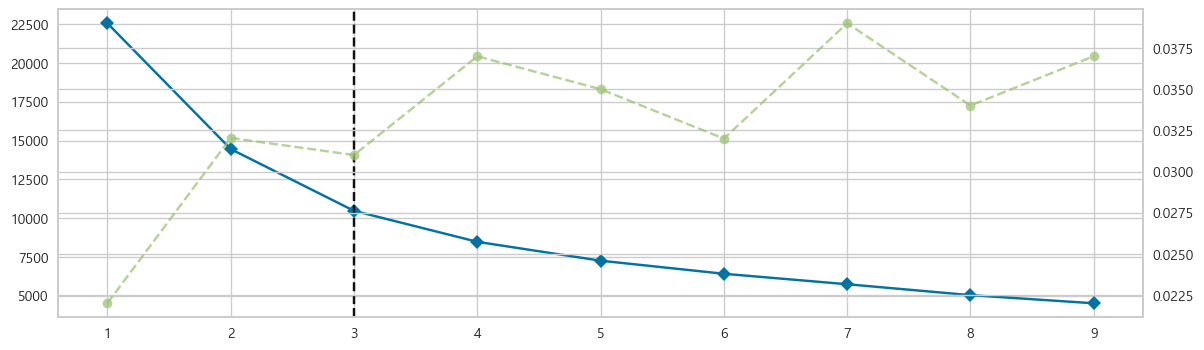

In [515]:
Elbow_function(pc_df)

In [516]:
kmeans_modeling_function(pc_df,3)

cluster
2    318
1    113
0     16
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,cluster
0,-2.486,0.727,-0.686,-1.294,2
1,-2.658,-3.951,0.339,0.196,2
2,-3.952,-3.136,0.266,-0.702,2
3,-3.601,-2.068,0.256,0.062,2
4,1.125,8.822,2.036,1.647,1
...,...,...,...,...,...
442,-2.845,1.365,0.612,0.214,2
443,0.261,-3.696,0.260,-2.592,2
444,-2.998,-1.608,-0.055,-0.532,2
445,7.296,-5.922,0.810,-5.724,2


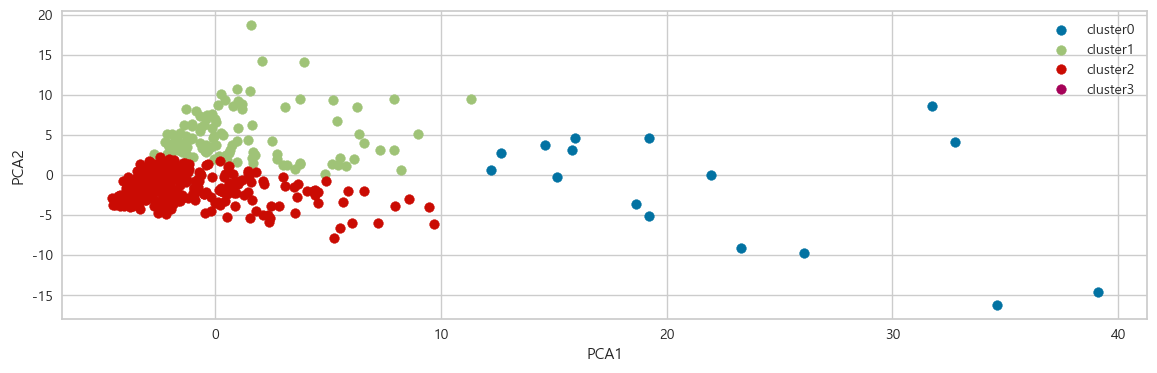

In [517]:
Model_performance_evaluation(pc_df,4)

In [518]:
chinese_food_cluster = df_concat(df_chinese_food)
chinese_food_cluster.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,KT구로지사,중식음식점,2
1,골목상권,가산동주민센터,중식음식점,2
2,골목상권,가산디지털단지역 1번 출입구,중식음식점,2
3,골목상권,가산초등학교(세일중학교),중식음식점,2
4,골목상권,강동역 4번(강풀만화거리),중식음식점,1


### 3-5-14. 패스트푸드점

In [519]:
df_fastfood = df[df['서비스_업종_코드_명']=='패스트푸드점']
df_fastfood = df_fastfood.reset_index(drop=True)
df_fastfood.shape

(414, 78)

#### 주성분 분석

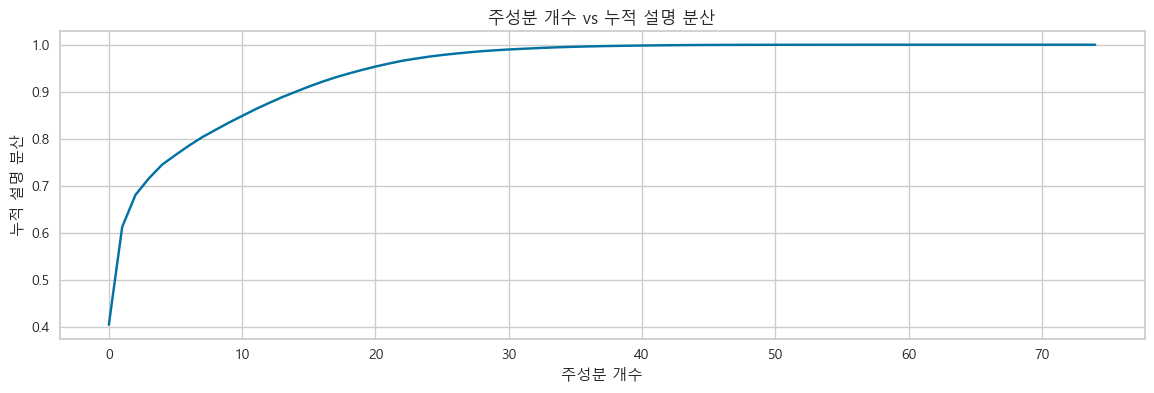

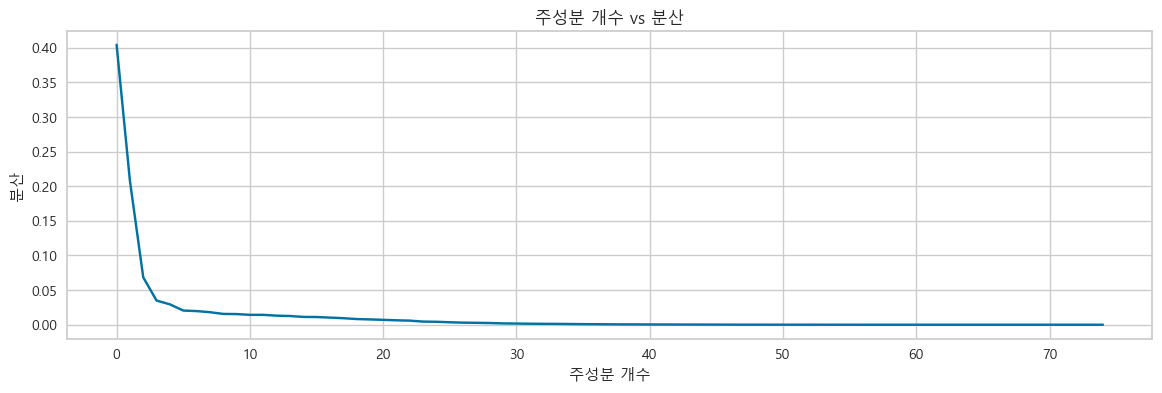

0.7449951011793184


,PC1,PC2,PC3,PC4
0,-3.112,-1.870,-0.337,-1.241
1,-0.460,-5.404,0.344,0.440
2,-3.777,-2.978,-0.751,-0.547
3,-3.264,1.583,1.748,0.012
4,-1.854,-4.695,-0.072,0.314
...,...,...,...,...
409,-1.939,-4.377,-0.299,-0.991
410,-2.958,-2.970,-0.663,-0.259
411,-0.497,-5.543,0.332,-0.319
412,-2.935,-2.882,-0.661,-1.217


In [520]:
pc_df = pca_function(df_fastfood,4)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

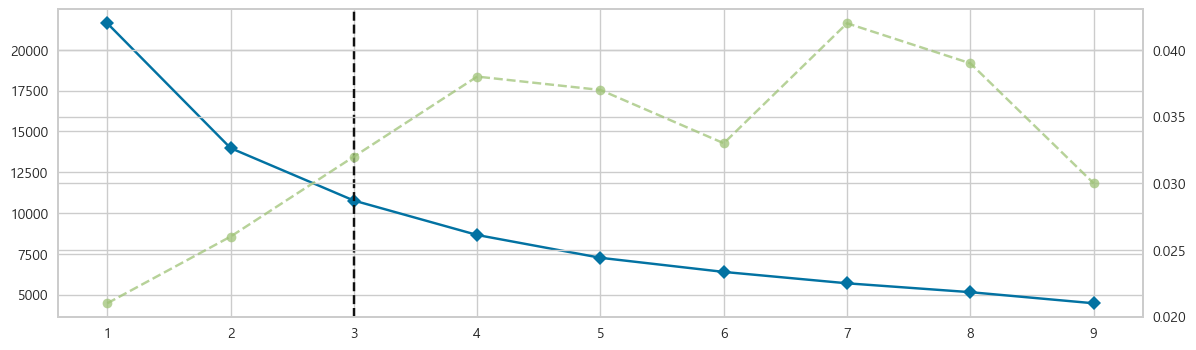

In [521]:
Elbow_function(pc_df)

In [522]:
kmeans_modeling_function(pc_df,3)

cluster
1    275
0    115
2     24
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,cluster
0,-3.112,-1.870,-0.337,-1.241,1
1,-0.460,-5.404,0.344,0.440,1
2,-3.777,-2.978,-0.751,-0.547,1
3,-3.264,1.583,1.748,0.012,1
4,-1.854,-4.695,-0.072,0.314,1
...,...,...,...,...,...
409,-1.939,-4.377,-0.299,-0.991,1
410,-2.958,-2.970,-0.663,-0.259,1
411,-0.497,-5.543,0.332,-0.319,1
412,-2.935,-2.882,-0.661,-1.217,1


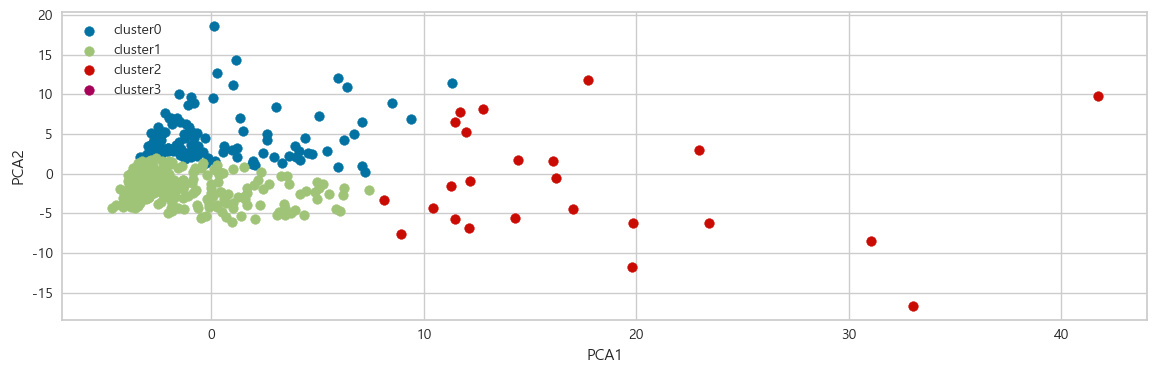

In [523]:
Model_performance_evaluation(pc_df,4)

In [524]:
fastfood_cluster = df_concat(df_fastfood)
fastfood_cluster.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,4.19민주묘지역 2번,패스트푸드점,1
1,골목상권,KT금천빌딩(금천구시설관리공단),패스트푸드점,1
2,골목상권,가인초등학교,패스트푸드점,1
3,골목상권,강동구립 천호도서관,패스트푸드점,1
4,골목상권,강일동주민센터,패스트푸드점,1


### 3-5-15. 제과점

In [525]:
df_bread = df[df['서비스_업종_코드_명']=='제과점']
df_bread = df_bread.reset_index(drop=True)
df_bread.shape

(393, 78)

#### 주성분 분석

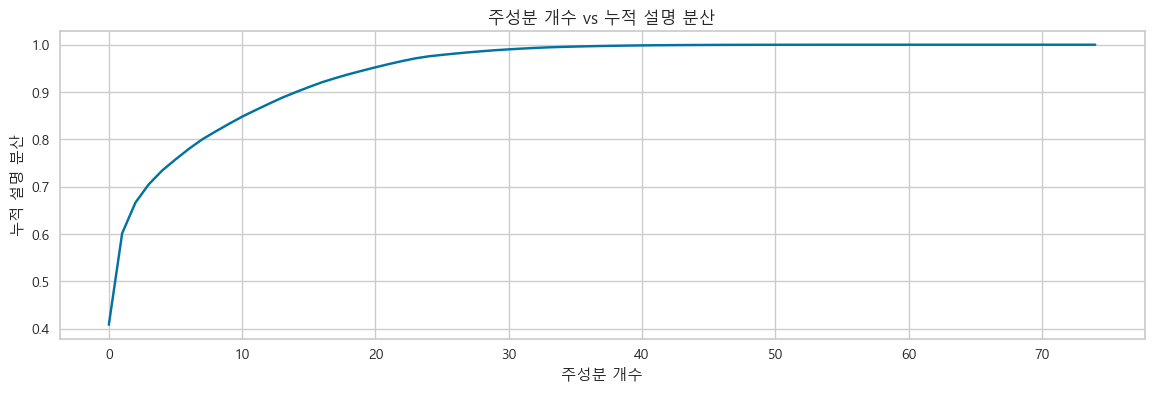

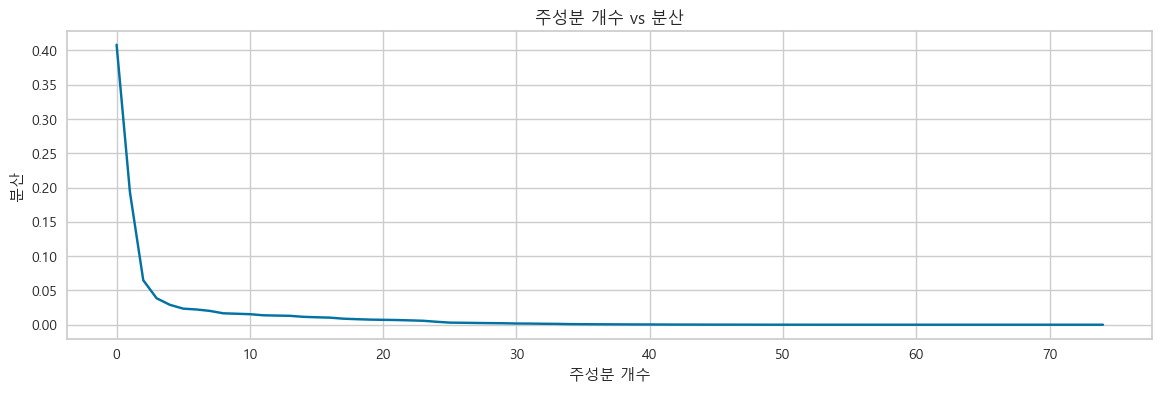

0.7341006543459453


,PC1,PC2,PC3,PC4
0,-1.399,6.865,-3.172,0.689
1,-1.557,10.267,-2.636,1.256
2,-2.432,-4.485,0.050,0.503
3,6.618,-5.661,-3.883,-0.865
4,-3.800,0.947,1.863,0.204
...,...,...,...,...
388,-3.578,-1.288,0.468,-0.782
389,-4.078,-1.208,0.474,-0.728
390,-3.580,-2.345,1.021,-1.824
391,-3.970,-2.542,1.194,-1.614


In [527]:
pc_df = pca_function(df_bread,4)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

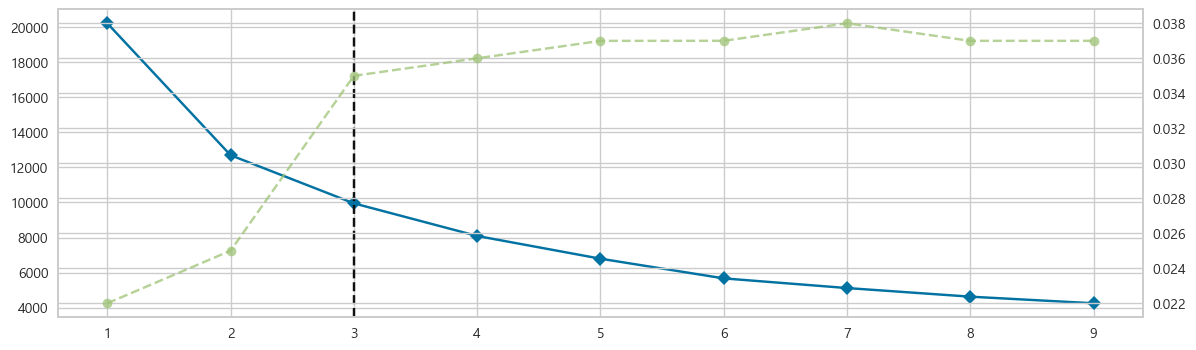

In [528]:
Elbow_function(pc_df)

In [529]:
kmeans_modeling_function(pc_df,3)

cluster
2    256
1     86
0     51
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,cluster
0,-1.399,6.865,-3.172,0.689,1
1,-1.557,10.267,-2.636,1.256,1
2,-2.432,-4.485,0.050,0.503,2
3,6.618,-5.661,-3.883,-0.865,0
4,-3.800,0.947,1.863,0.204,2
...,...,...,...,...,...
388,-3.578,-1.288,0.468,-0.782,2
389,-4.078,-1.208,0.474,-0.728,2
390,-3.580,-2.345,1.021,-1.824,2
391,-3.970,-2.542,1.194,-1.614,2


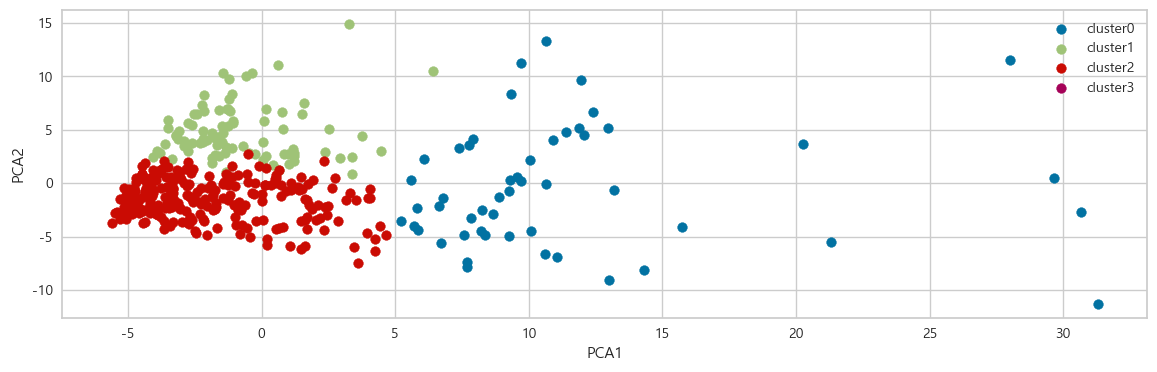

In [530]:
Model_performance_evaluation(pc_df,4)

In [531]:
bread_cluster = df_concat(df_bread)
bread_cluster.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,강동구립성내도서관,제과점,1
1,골목상권,강동역 4번(강풀만화거리),제과점,1
2,골목상권,강일동주민센터,제과점,2
3,골목상권,개봉역,제과점,0
4,골목상권,경리단길남측,제과점,2


### 3-5-16. 치과의원

In [532]:
df_dental = df[df['서비스_업종_코드_명']=='치과의원']
df_dental = df_dental.reset_index(drop=True)
df_dental.shape

(373, 78)

#### 주성분 분석

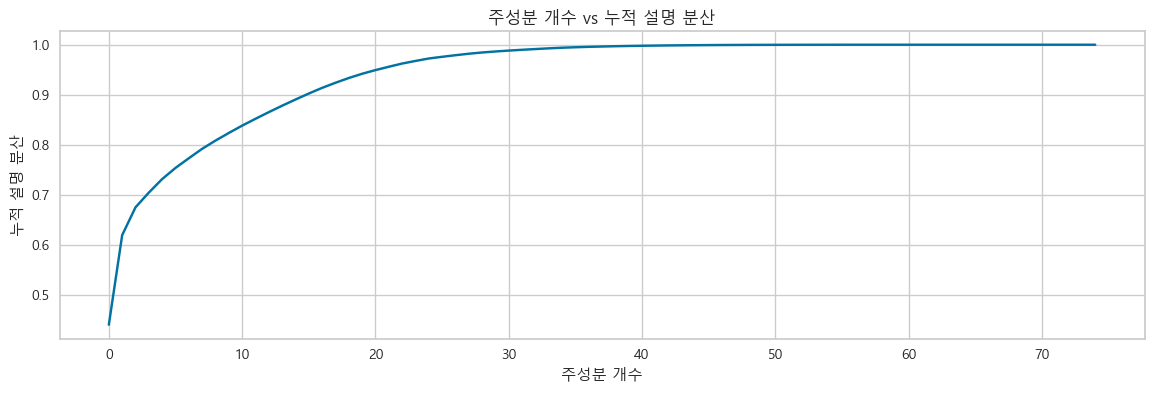

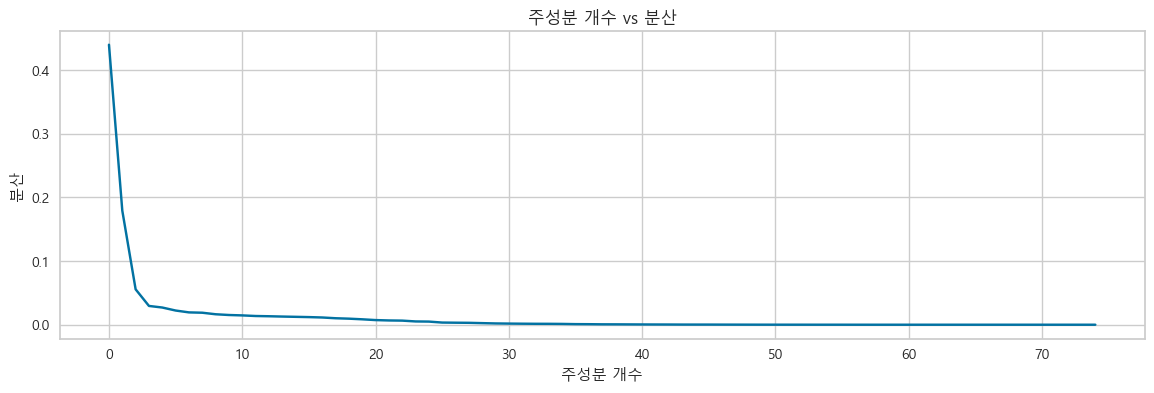

0.7312592218275048


,PC1,PC2,PC3,PC4
0,-2.717,-0.528,-0.824,-0.300
1,-2.007,-4.377,-0.781,-0.568
2,-4.165,-2.186,0.134,-0.432
3,-3.746,-3.416,0.114,0.642
4,-3.178,-1.228,-0.130,-0.117
...,...,...,...,...
368,-3.468,-3.695,-0.050,-0.630
369,-5.688,-2.841,0.750,-0.620
370,-2.513,1.964,-1.214,-0.405
371,-2.160,-1.534,-0.066,-0.472


In [534]:
pc_df = pca_function(df_dental,4)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

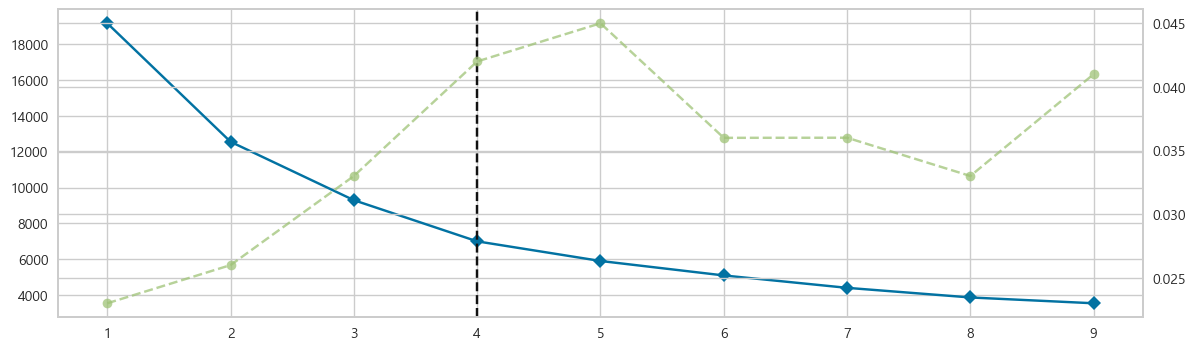

In [535]:
Elbow_function(pc_df)

In [536]:
kmeans_modeling_function(pc_df,4)

cluster
2    241
1     74
0     52
3      6
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,cluster
0,-2.717,-0.528,-0.824,-0.300,2
1,-2.007,-4.377,-0.781,-0.568,2
2,-4.165,-2.186,0.134,-0.432,2
3,-3.746,-3.416,0.114,0.642,2
4,-3.178,-1.228,-0.130,-0.117,2
...,...,...,...,...,...
368,-3.468,-3.695,-0.050,-0.630,2
369,-5.688,-2.841,0.750,-0.620,2
370,-2.513,1.964,-1.214,-0.405,2
371,-2.160,-1.534,-0.066,-0.472,2


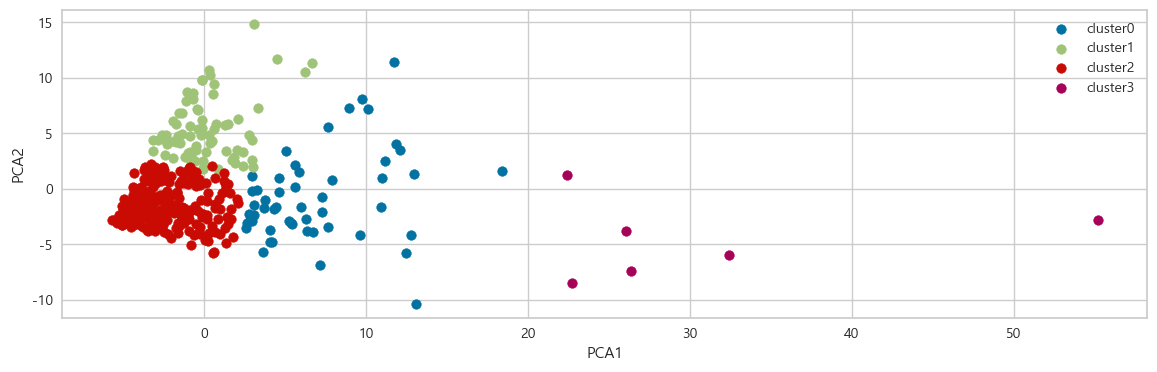

In [537]:
Model_performance_evaluation(pc_df,4)

In [538]:
dental_cluster = df_concat(df_dental)
dental_cluster.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,KB국민은행 망원동지점,치과의원,2
1,골목상권,가양역 10번,치과의원,2
2,골목상권,가인초등학교,치과의원,2
3,골목상권,강일동주민센터,치과의원,2
4,골목상권,개봉역,치과의원,2


### 3-5-17. 일식음식점

In [539]:
df_japanese_food = df[df['서비스_업종_코드_명']=='일식음식점']
df_japanese_food = df_japanese_food.reset_index(drop=True)
df_japanese_food.shape

(358, 78)

#### 주성분 분석

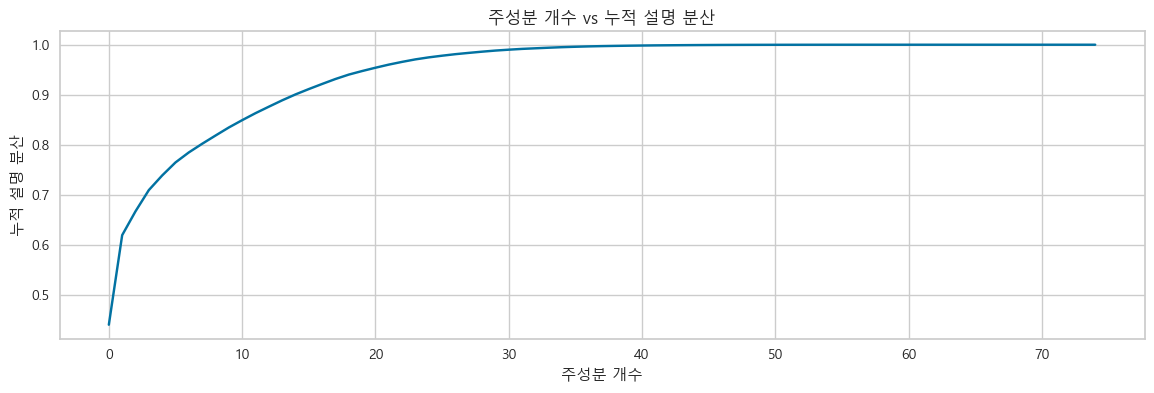

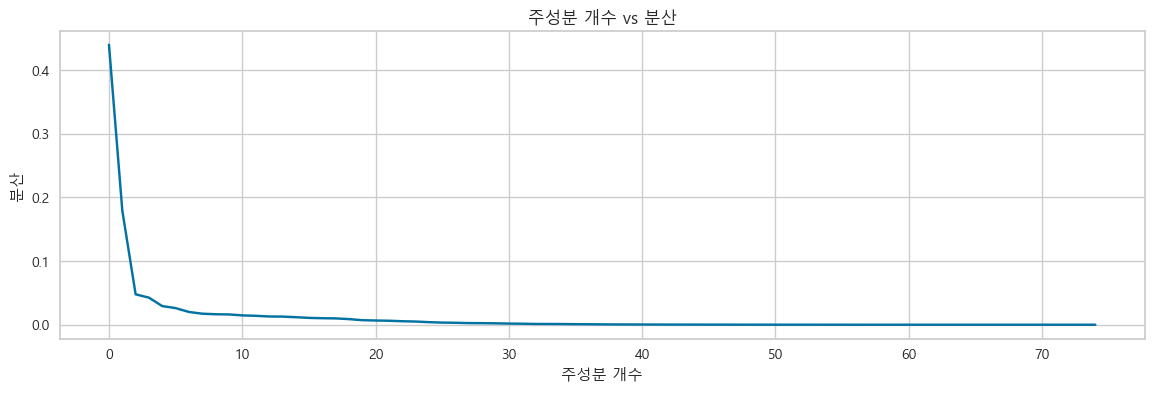

0.7383060224418172


,PC1,PC2,PC3,PC4
0,-3.736,-1.217,-0.629,0.761
1,-4.003,-1.325,1.528,0.496
2,-4.023,-2.450,-0.494,0.064
3,0.636,9.191,2.316,-0.500
4,-4.583,-3.276,-0.041,-0.114
...,...,...,...,...
353,-3.114,-1.364,-0.220,0.439
354,3.345,-4.771,1.167,5.283
355,1.529,-4.435,0.633,4.718
356,-4.347,-2.743,0.218,0.463


In [541]:
pc_df = pca_function(df_japanese_food,4)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

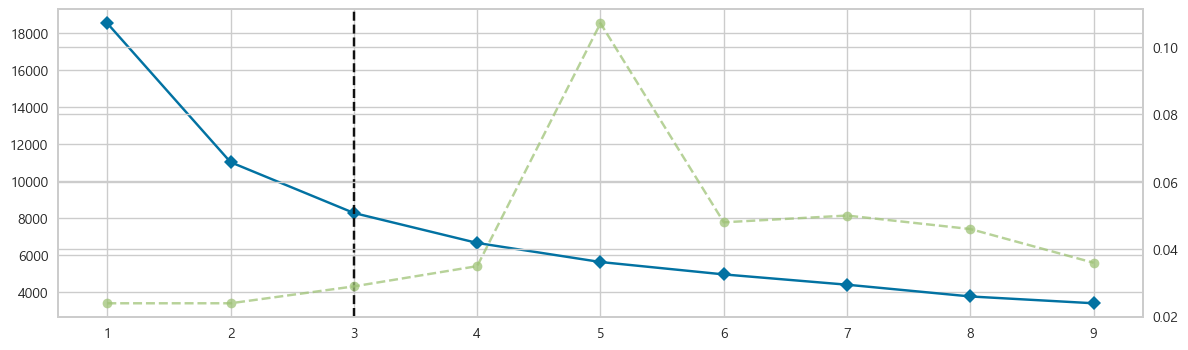

In [542]:
Elbow_function(pc_df)

In [543]:
kmeans_modeling_function(pc_df,3)

cluster
1    256
0     78
2     24
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,cluster
0,-3.736,-1.217,-0.629,0.761,1
1,-4.003,-1.325,1.528,0.496,1
2,-4.023,-2.450,-0.494,0.064,1
3,0.636,9.191,2.316,-0.500,0
4,-4.583,-3.276,-0.041,-0.114,1
...,...,...,...,...,...
353,-3.114,-1.364,-0.220,0.439,1
354,3.345,-4.771,1.167,5.283,1
355,1.529,-4.435,0.633,4.718,1
356,-4.347,-2.743,0.218,0.463,1


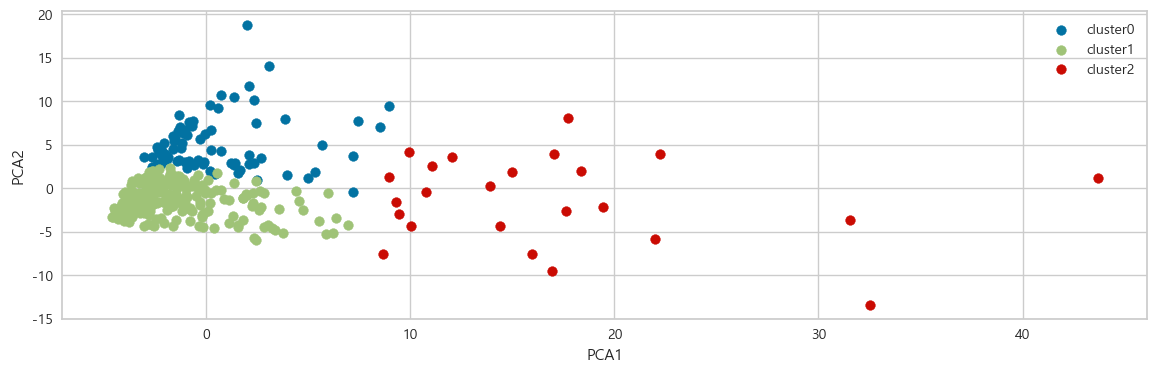

In [544]:
Model_performance_evaluation(pc_df,3)

In [545]:
japanese_food_cluster = df_concat(df_japanese_food)
japanese_food_cluster.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,4.19민주묘지역 2번,일식음식점,1
1,골목상권,G타워,일식음식점,1
2,골목상권,가인초등학교,일식음식점,1
3,골목상권,강동역 4번(강풀만화거리),일식음식점,0
4,골목상권,강일동주민센터,일식음식점,1


### 3-5-18. 양식음식점

In [546]:
df_western_food = df[df['서비스_업종_코드_명']=='양식음식점']
df_western_food = df_western_food.reset_index(drop=True)
df_western_food.shape

(345, 78)

#### 주성분 분석

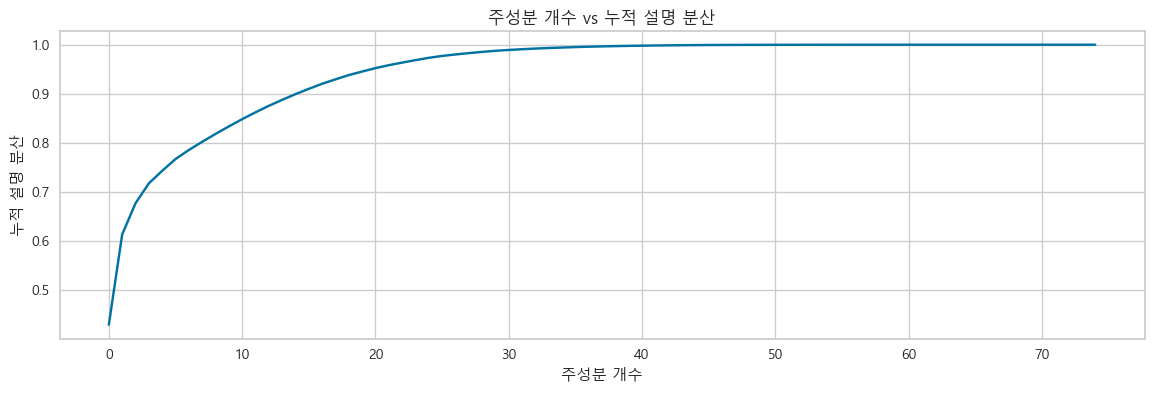

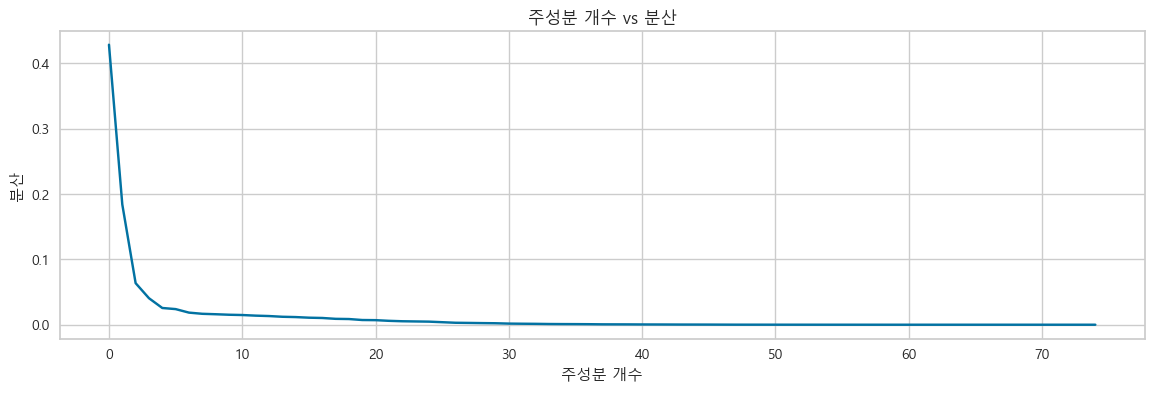

0.7427484697964446


,PC1,PC2,PC3,PC4
0,-2.836,-0.086,0.733,-0.382
1,-2.073,-1.786,0.451,-1.304
2,1.898,1.261,0.716,1.469
3,3.453,2.048,3.271,1.134
4,0.111,-7.641,3.259,1.304
...,...,...,...,...
340,-3.719,3.700,0.303,-1.073
341,-3.374,2.223,-0.250,-1.412
342,-1.762,2.844,0.471,-1.897
343,0.506,4.040,1.025,-2.609


In [548]:
pc_df = pca_function(df_western_food,4)
pc_df

#### K-means

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

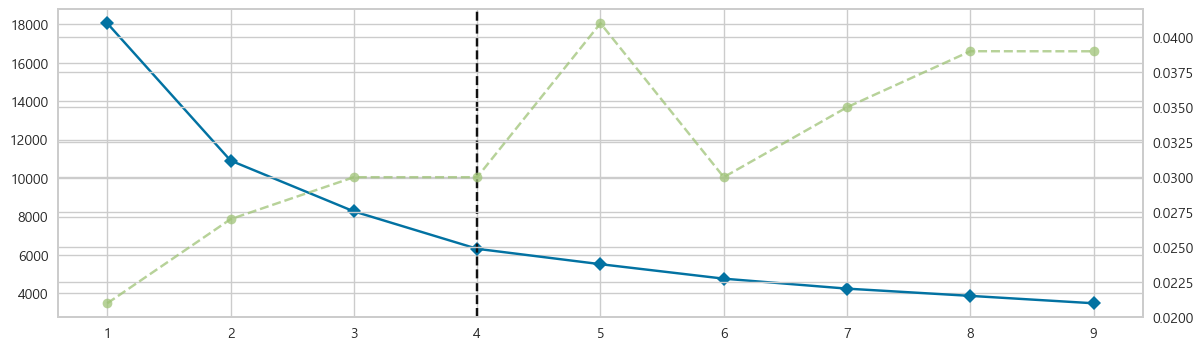

In [549]:
Elbow_function(pc_df)

In [550]:
kmeans_modeling_function(pc_df,4)

cluster
2    237
0     83
1     21
3      4
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,cluster
0,-2.836,-0.086,0.733,-0.382,2
1,-2.073,-1.786,0.451,-1.304,2
2,1.898,1.261,0.716,1.469,2
3,3.453,2.048,3.271,1.134,2
4,0.111,-7.641,3.259,1.304,0
...,...,...,...,...,...
340,-3.719,3.700,0.303,-1.073,2
341,-3.374,2.223,-0.250,-1.412,2
342,-1.762,2.844,0.471,-1.897,2
343,0.506,4.040,1.025,-2.609,2


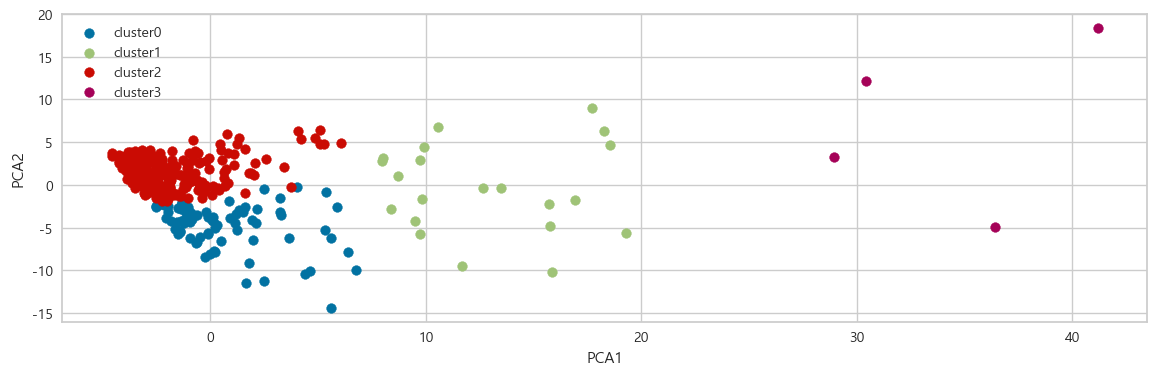

In [551]:
Model_performance_evaluation(pc_df,4)

In [552]:
western_food_cluster = df_concat(df_western_food)
western_food_cluster.head()

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,cluster
0,골목상권,강남구청역 4번,양식음식점,2
1,골목상권,건대입구역 1번,양식음식점,2
2,골목상권,경리단길남측,양식음식점,2
3,골목상권,경리단길북측,양식음식점,2
4,골목상권,경성고등학교,양식음식점,0
